# **Mount Google Drive**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Remove Existing Directory**


In [ ]:
import shutil

shutil.rmtree('/content/dm')

# **Create a Zip Archive**


In [ ]:
import shutil
from google.colab import files

# Define the directory and zip file name
dir_to_zip = '/content/Dd/trained_predicted_test_patched_depthmaps'
output_filename = '/content/Dd/trained_predicted_test_patched_depthmaps'

# Create a zip file
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', dir_to_zip)

'/content/Dd/trained_predicted_test_patched_depthmaps.zip'

# **Move Zip File to Google Drive**


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your file and the destination directory in Google Drive
source = '/content/Dd/trained_predicted_test_patched_depthmaps.zip'
destination_dir = '/content/drive/My Drive/colab_output'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Specify the full destination path including the filename
destination = os.path.join(destination_dir, 'trained_predicted_test_patched_depthmaps.zip')

# Move the file
!cp "$source" "$destination"

print("File has been uploaded to your Google Drive.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File has been uploaded to your Google Drive.


# **Extract Zip File**


In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/drive/MyDrive/colab_output/trained_predicted_test_patched_depthmaps.zip'
# Path to extract
extract_path = '/content/Dd/trained_predicted_test_patched_depthmaps'

# Create extract path if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# **Generate CSV with Image and Depthmap Paths**


In [ ]:
import os
import csv

# Define the directories for test data
test_image_dir = '/content/Dd/test_patched/images'
test_depth_dir = '/content/Dd/test_patched/deptmaps'

# Define the output CSV file path for the test set
csv_output_path = '/content/Dd/patched_test.csv'

# Helper function to get and sort paths from a directory
def get_image_depth_pairs(image_dir, depth_dir):
    image_files = sorted(os.listdir(image_dir))
    depth_files = sorted(os.listdir(depth_dir))

    # Ensure both lists have the same number of files
    if len(image_files) != len(depth_files):
        raise ValueError(f"Number of images and depthmaps do not match in {image_dir} and {depth_dir}")

    # Create full paths and sort them
    image_paths = sorted([os.path.join(image_dir, f) for f in image_files])
    depth_paths = sorted([os.path.join(depth_dir, f) for f in depth_files])

    # Return list of tuples (image_path, depth_path)
    return list(zip(image_paths, depth_paths))

# Get image-depth pairs from the test directory
test_pairs = get_image_depth_pairs(test_image_dir, test_depth_dir)

# Write the pairs to a CSV file
with open(csv_output_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)

    # Write header
    #writer.writerow(['image_path', 'depthmap_path'])

    # Write the image and depthmap paths
    for image_path, depth_path in test_pairs:
        writer.writerow([image_path, depth_path])

print(f"Test CSV file created at {csv_output_path}")

Test CSV file created at /content/Dd/patched_test.csv


# **Main code section**

In [ ]:
%cd /content/Dd

/content/Dd


# **Set Training Parameters**


In [ ]:
batch_size     = 8
learning_rate  = 0.0001
epochs         = 10

# **Import Model and Data Loader**


In [ ]:
from model import DepthEstimate

model = DepthEstimate()

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Base model loaded DenseNet169

Model created.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
from data import DataLoader

dl = DataLoader()
train_generator = dl.get_batched_dataset(batch_size)

print('Data loader ready.')

Data loader ready.


# **Compile Model**


In [ ]:
import tensorflow
from loss import depth_loss_function

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate, amsgrad=True)

model.compile(loss=depth_loss_function, optimizer=optimizer)

# **Create Checkpoint Callback**


In [ ]:
# Create checkpoint callback
import os
checkpoint_path = "training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

# **Define Custom Callback for Depth Range Monitoring and train the model**


Epoch 1/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 0.0110
Epoch 1: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Epoch 1:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9839]


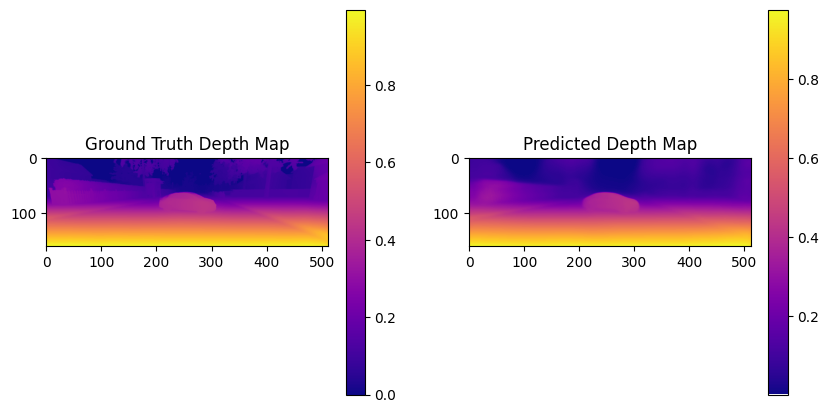

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 531s 169ms/step - loss: 0.0110
Epoch 2/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0063
Epoch 2: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 2:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9901]


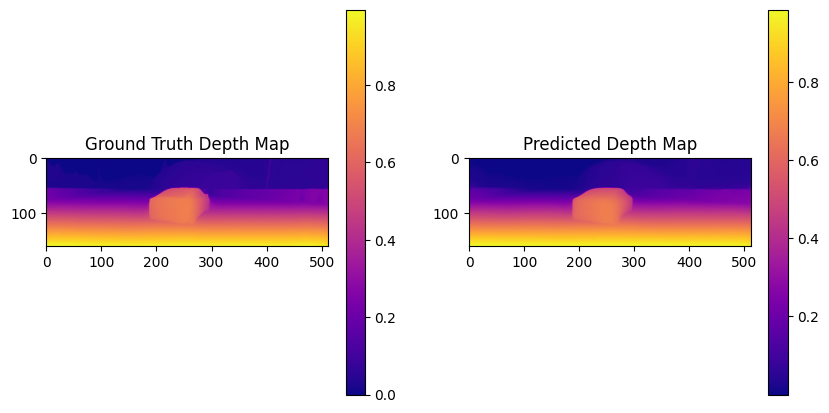

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 185s 157ms/step - loss: 0.0063
Epoch 3/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0055
Epoch 3: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 3:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9843]


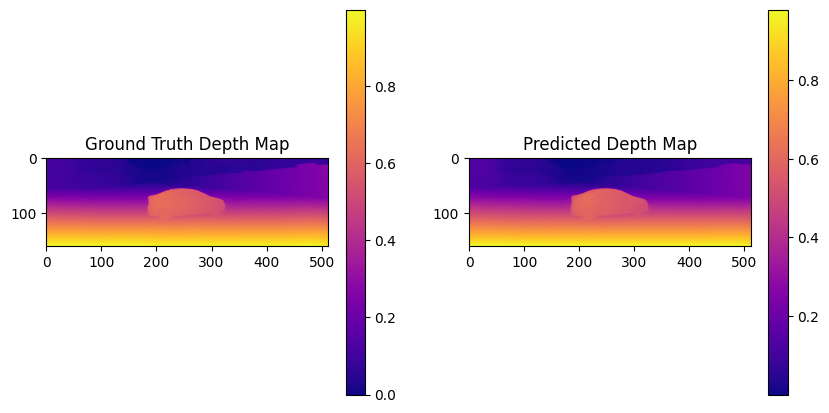

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 185s 156ms/step - loss: 0.0055
Epoch 4/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0050
Epoch 4: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 4:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9850]


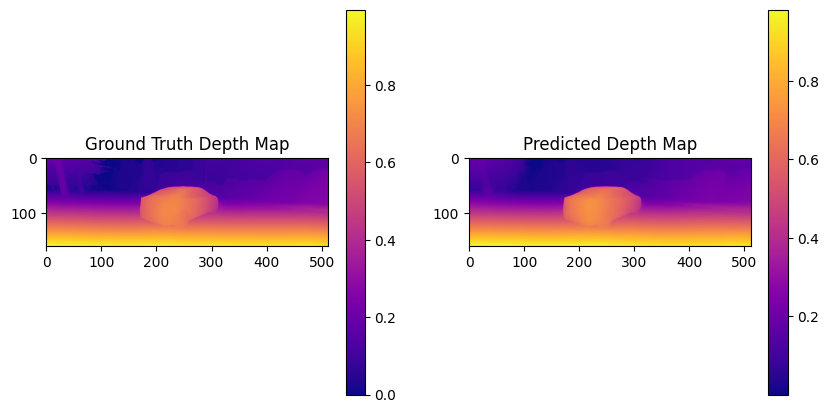

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 184s 156ms/step - loss: 0.0050
Epoch 5/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0047
Epoch 5: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 5:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9861]


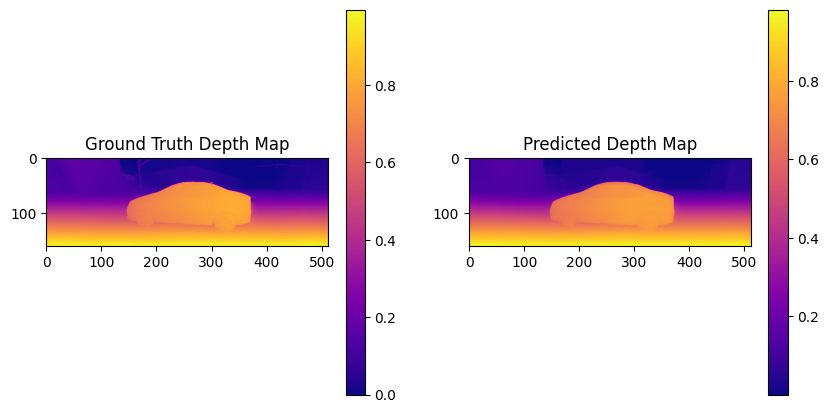

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 184s 156ms/step - loss: 0.0047
Epoch 6/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0044
Epoch 6: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 6:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9898]


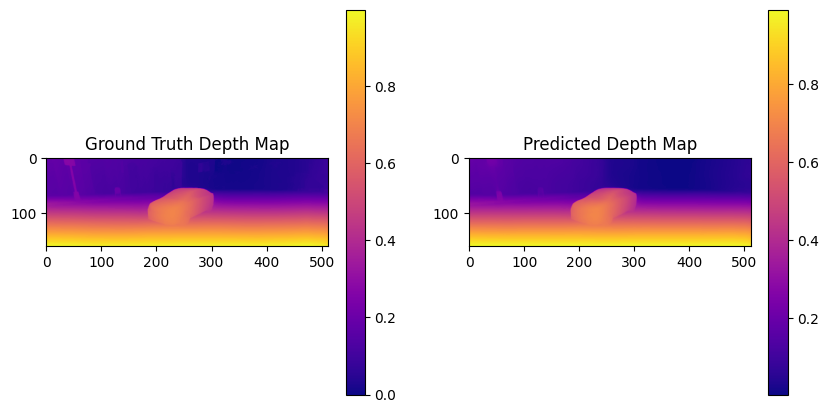

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 184s 156ms/step - loss: 0.0044
Epoch 7/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0042
Epoch 7: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 7:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9857]


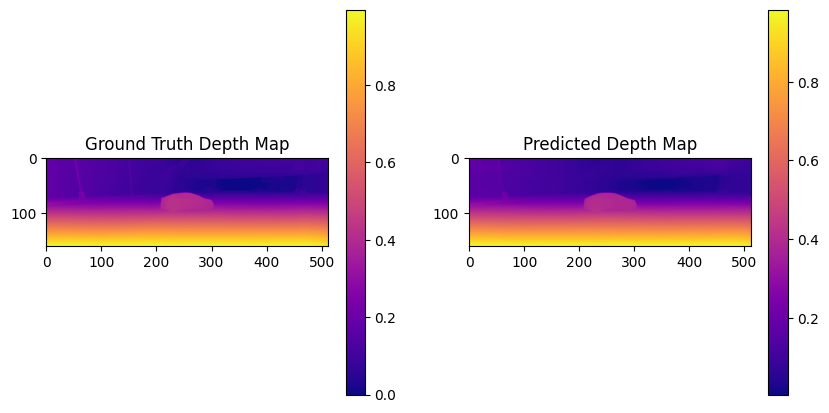

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 184s 155ms/step - loss: 0.0042
Epoch 8/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0040
Epoch 8: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 8:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9875]


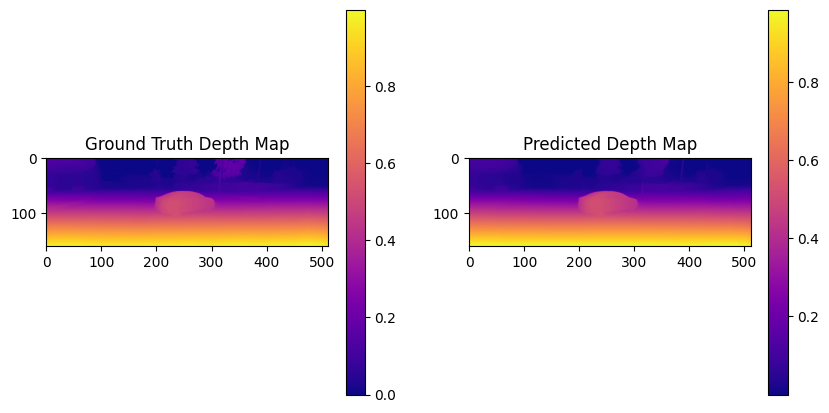

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 184s 156ms/step - loss: 0.0040
Epoch 9/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0038
Epoch 9: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 9:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9908]


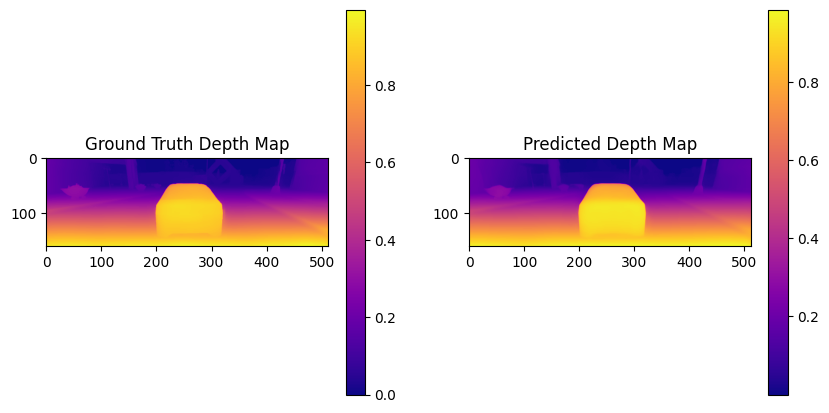

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 183s 155ms/step - loss: 0.0038
Epoch 10/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0037
Epoch 10: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 10:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9884]


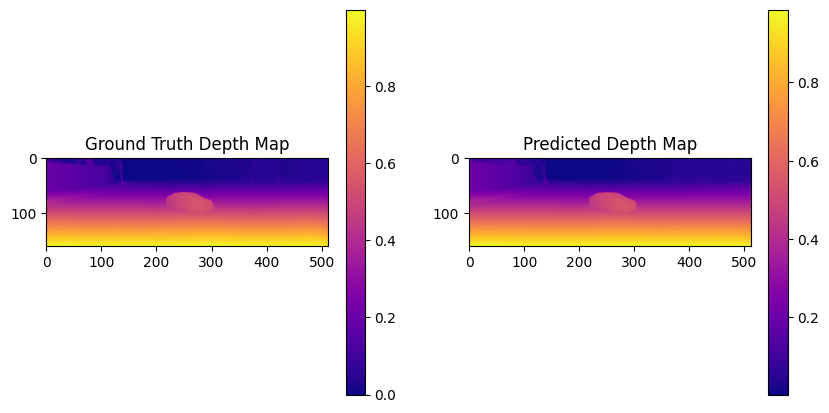

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 185s 157ms/step - loss: 0.0037


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

class DepthRangeMonitor(tf.keras.callbacks.Callback):
    def __init__(self, train_data):
        super(DepthRangeMonitor, self).__init__()
        self.train_data = train_data

    def on_epoch_end(self, epoch, logs=None):
        # Get a batch of data from the training set
        sample_batch = next(iter(self.train_data))

        # Get the ground truth and the predictions
        y_true = sample_batch[1]  # True depth maps
        y_pred = self.model.predict(sample_batch[0])  # Predicted depth maps

        # Calculate the min and max values
        true_min, true_max = tf.reduce_min(y_true), tf.reduce_max(y_true)
        pred_min, pred_max = tf.reduce_min(y_pred), tf.reduce_max(y_pred)

        # Print the min and max values
        print(f'Epoch {epoch + 1}:')
        print(f'  Ground truth depth range: [{true_min.numpy():.4f}, {true_max.numpy():.4f}]')
        print(f'  Predicted depth range: [{pred_min.numpy():.4f}, {pred_max.numpy():.4f}]')

        # Visualize the first depth map in the batch
        plt.figure(figsize=(10, 5))

        # Ground truth depth map
        plt.subplot(1, 2, 1)
        plt.imshow(y_true[0, :, :, 0], cmap='plasma')
        plt.title('Ground Truth Depth Map')
        plt.colorbar()

        # Predicted depth map
        plt.subplot(1, 2, 2)
        plt.imshow(y_pred[0, :, :, 0], cmap='plasma')
        plt.title('Predicted Depth Map')
        plt.colorbar()

        # Show the plots
        plt.show()

# Use the callback during training
depth_range_monitor = DepthRangeMonitor(train_generator)
model.fit(train_generator, epochs=10, steps_per_epoch=dl.length // batch_size, callbacks=[cp_callback, depth_range_monitor])


# **Import Libraries, Initialize DataLoader, Load Model, and Evaluate**


Base model loaded DenseNet169

Model created.
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
True Depth Range: [0.0000, 0.9971]
Predicted Depth Range: [0.4874, 0.5240]


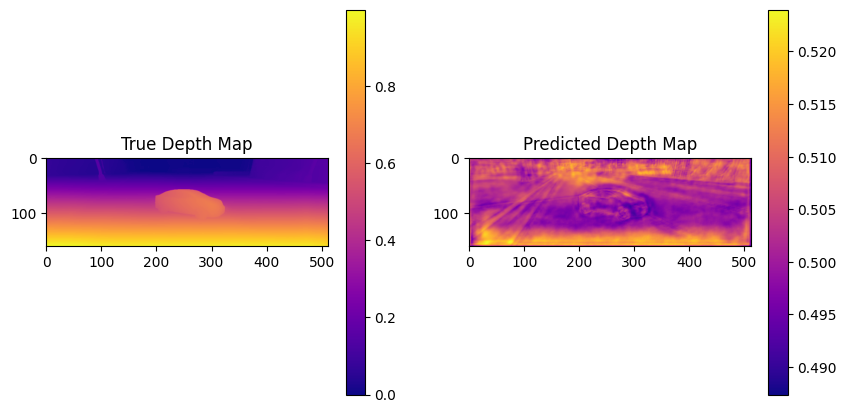

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
True Depth Range: [0.0000, 0.9951]
Predicted Depth Range: [0.4852, 0.5218]


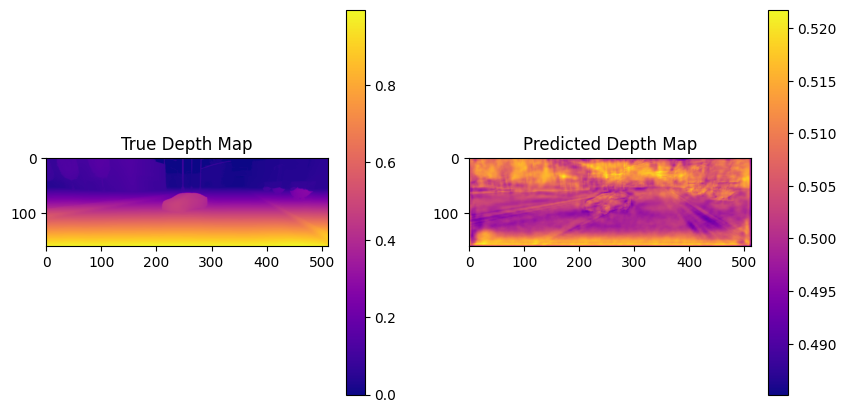

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
True Depth Range: [0.0000, 0.9961]
Predicted Depth Range: [0.4884, 0.5254]


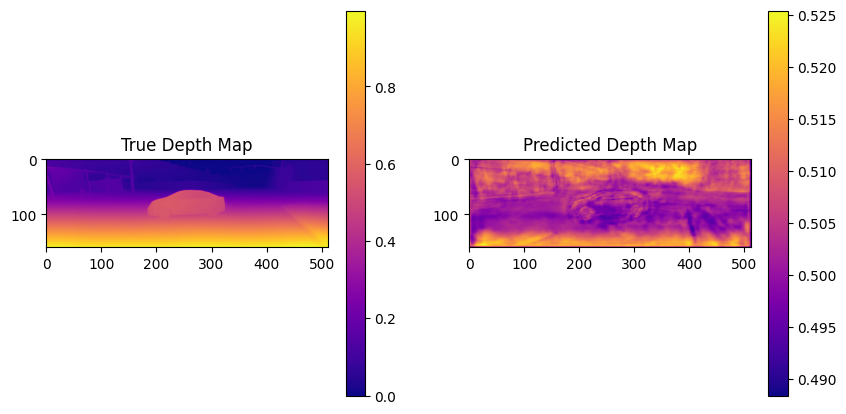

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
True Depth Range: [0.0000, 0.9951]
Predicted Depth Range: [0.4893, 0.5253]


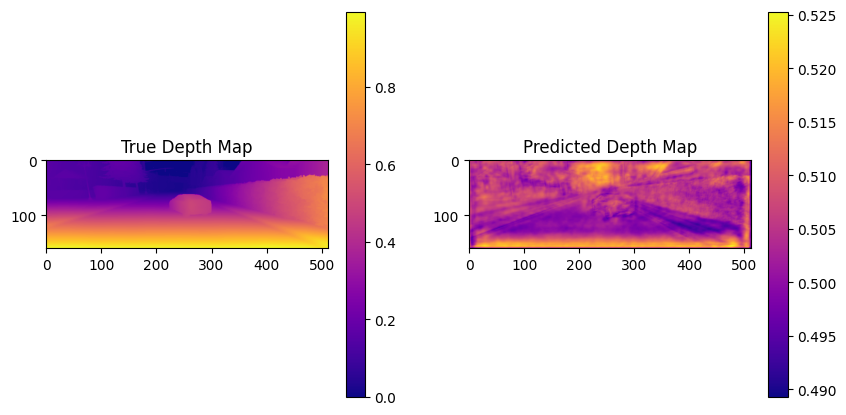

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
True Depth Range: [0.0000, 0.9951]
Predicted Depth Range: [0.4830, 0.5336]


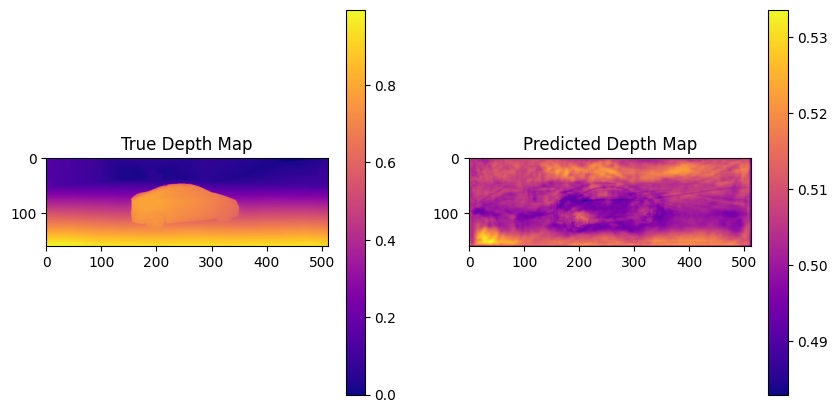

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
True Depth Range: [0.0000, 0.9951]
Predicted Depth Range: [0.4882, 0.5281]


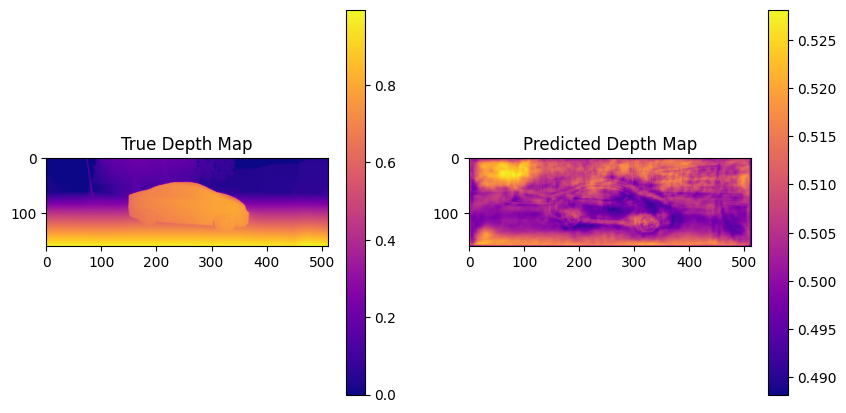

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
True Depth Range: [0.0000, 0.9951]
Predicted Depth Range: [0.4870, 0.5228]


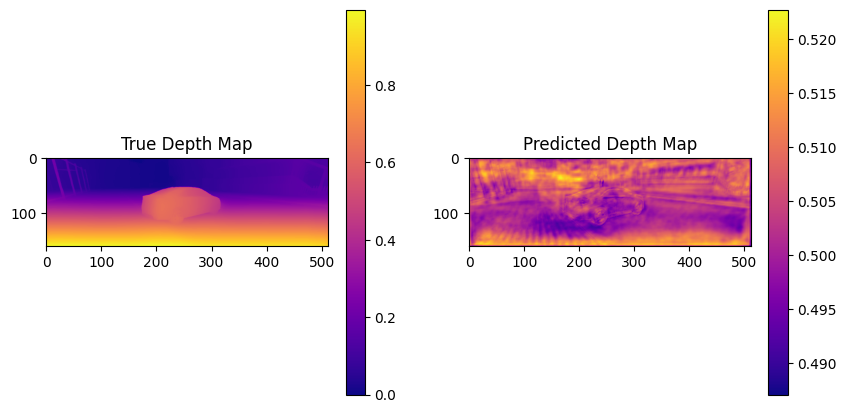

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
True Depth Range: [0.0000, 0.9951]
Predicted Depth Range: [0.4871, 0.5245]


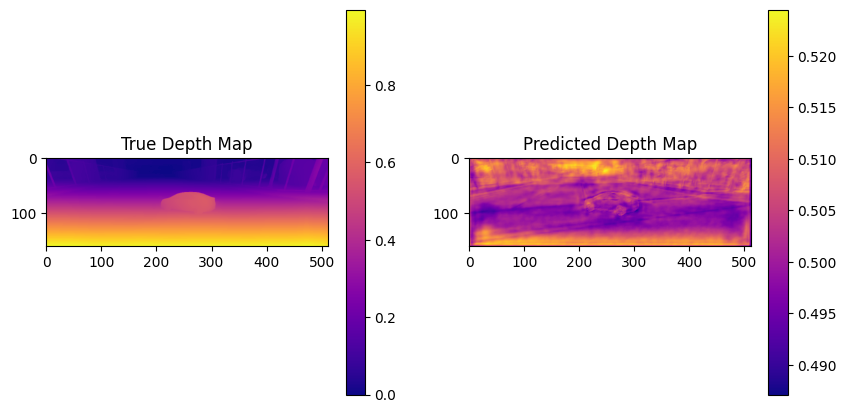

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
True Depth Range: [0.0000, 0.9951]
Predicted Depth Range: [0.4871, 0.5293]


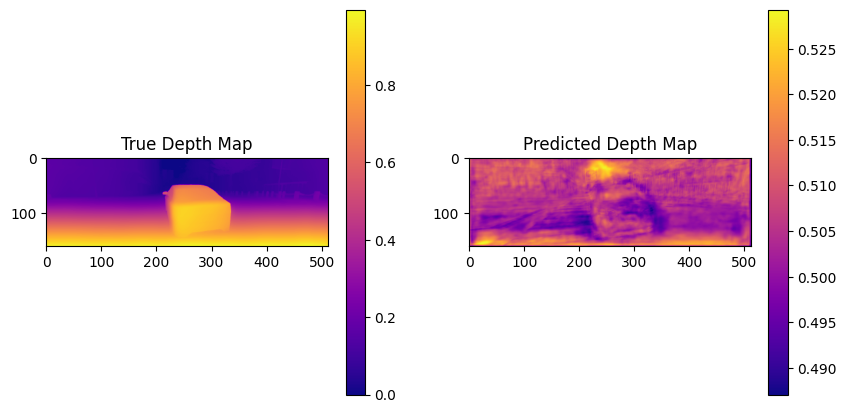

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
True Depth Range: [0.0000, 0.9951]
Predicted Depth Range: [0.4873, 0.5292]


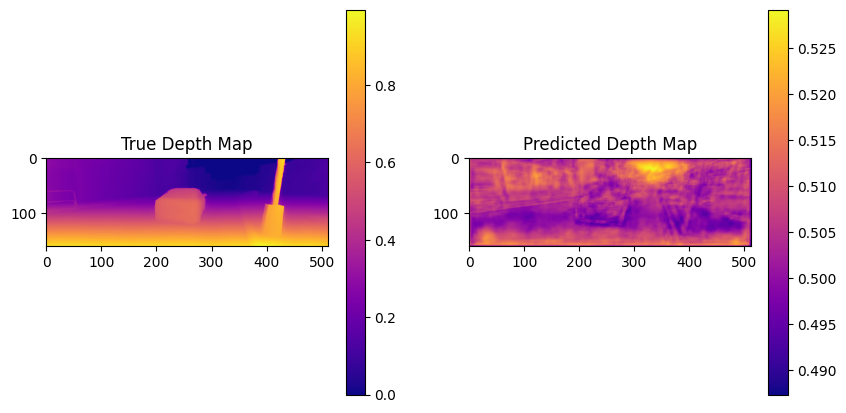

In [ ]:
# Import DataLoader from data.py
from data import DataLoader

# Import the DepthEstimate model from model.py
from model import DepthEstimate

import tensorflow as tf
import matplotlib.pyplot as plt

# Initialize DataLoader with your test CSV
dl = DataLoader(csv_file='test_data.csv')  # Path to your test CSV
test_generator = dl.get_batched_dataset(batch_size=1)  # Use batch size 1 for testing single images

# Load your trained model
model = DepthEstimate()
model.load_weights('/content/Dd/training_3/cp.weights.h5')

# Iterate over the test dataset
for rgb, true_depth in test_generator.take(10):  # Iterate over 10 test examples
    # Predict the depth map
    pred_depth = model.predict(rgb)

    # Compare predicted depth map with the ground truth
    print(f"True Depth Range: [{tf.reduce_min(true_depth).numpy():.4f}, {tf.reduce_max(true_depth).numpy():.4f}]")
    print(f"Predicted Depth Range: [{tf.reduce_min(pred_depth).numpy():.4f}, {tf.reduce_max(pred_depth).numpy():.4f}]")

    # Visualization (optional)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(true_depth[0, :, :, 0], cmap='plasma')
    plt.title('True Depth Map')
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow(pred_depth[0, :, :, 0], cmap='plasma')
    plt.title('Predicted Depth Map')
    plt.colorbar()

    plt.show()

# **Not god results - Re-Train the Model**


Epoch 1/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0109
Epoch 1: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Epoch 1:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9870]


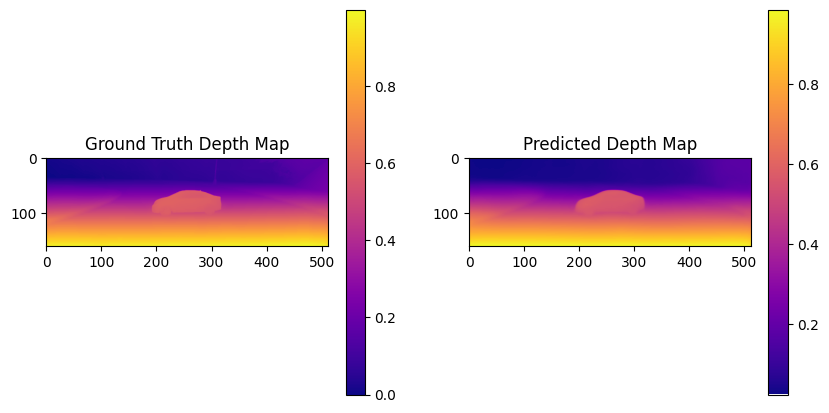

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 524s 167ms/step - loss: 0.0109
Epoch 2/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0062
Epoch 2: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 2:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9860]


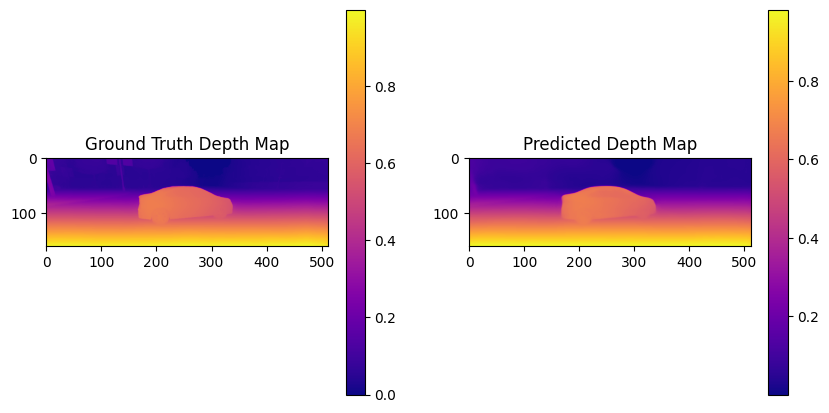

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 183s 155ms/step - loss: 0.0062
Epoch 3/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0054
Epoch 3: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 3:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9869]


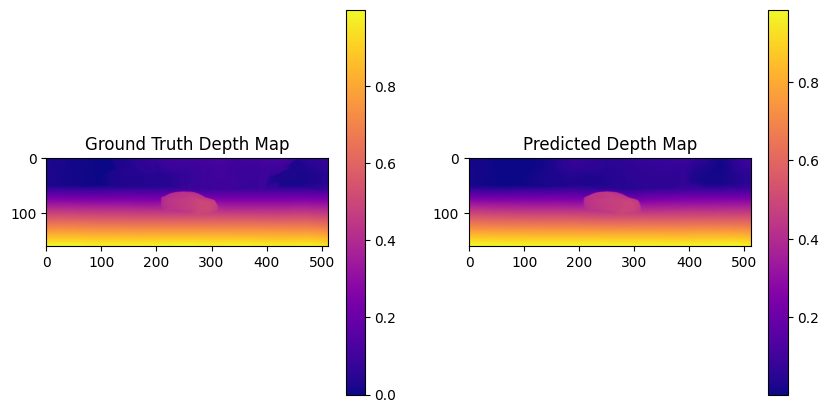

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 184s 156ms/step - loss: 0.0054
Epoch 4/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0049
Epoch 4: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 4:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9833]


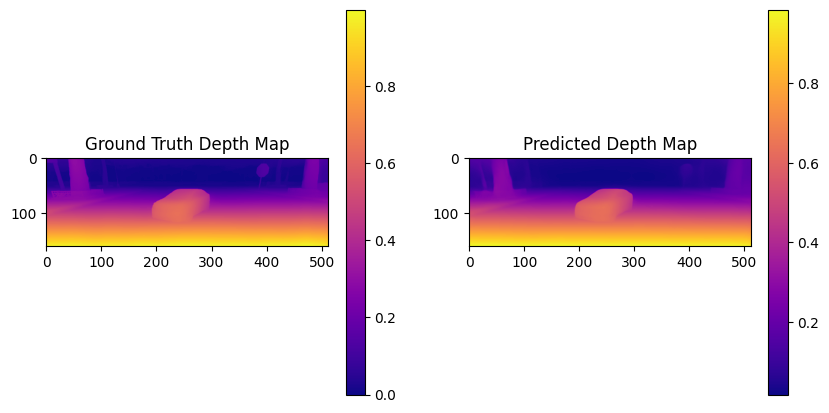

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 183s 155ms/step - loss: 0.0049
Epoch 5/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0047
Epoch 5: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 5:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9935]


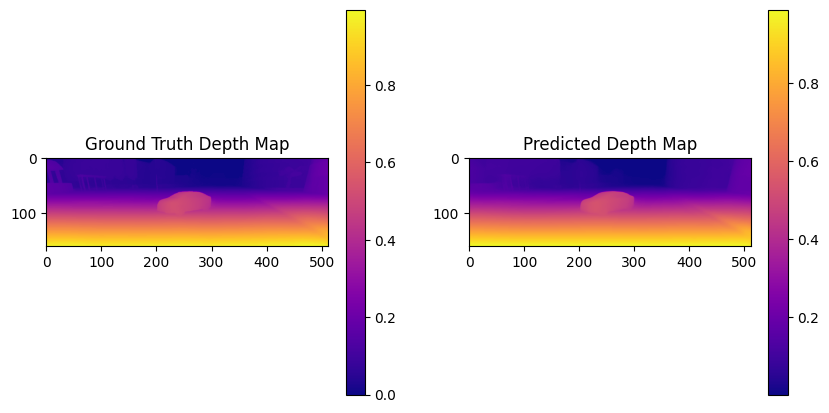

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 184s 156ms/step - loss: 0.0047
Epoch 6/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0044
Epoch 6: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 6:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9888]


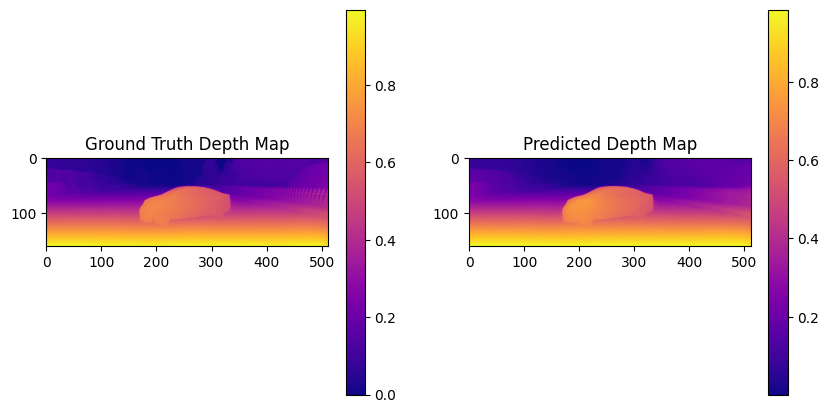

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 183s 155ms/step - loss: 0.0044
Epoch 7/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0041
Epoch 7: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Epoch 7:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9897]


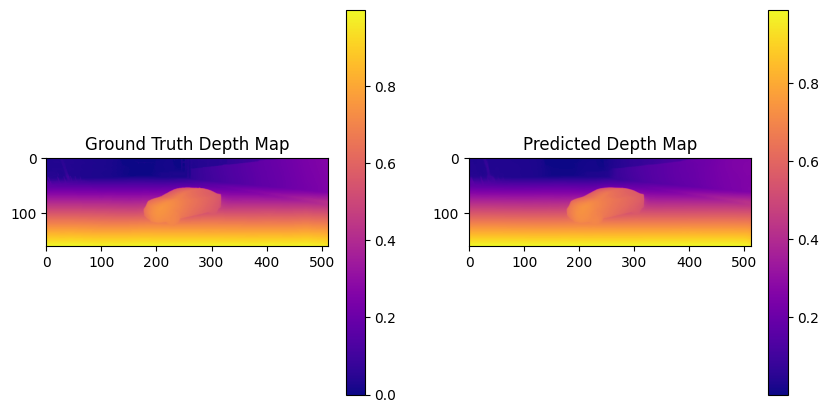

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 183s 155ms/step - loss: 0.0041
Epoch 8/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0040
Epoch 8: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 8:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9882]


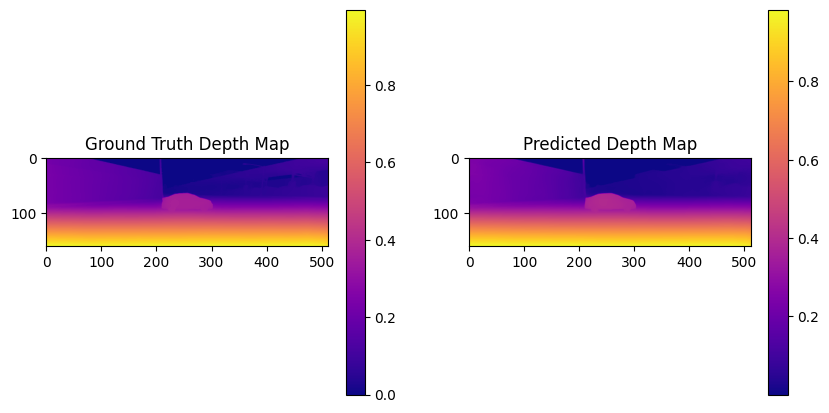

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 184s 155ms/step - loss: 0.0040
Epoch 9/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0038
Epoch 9: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 9:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9943]


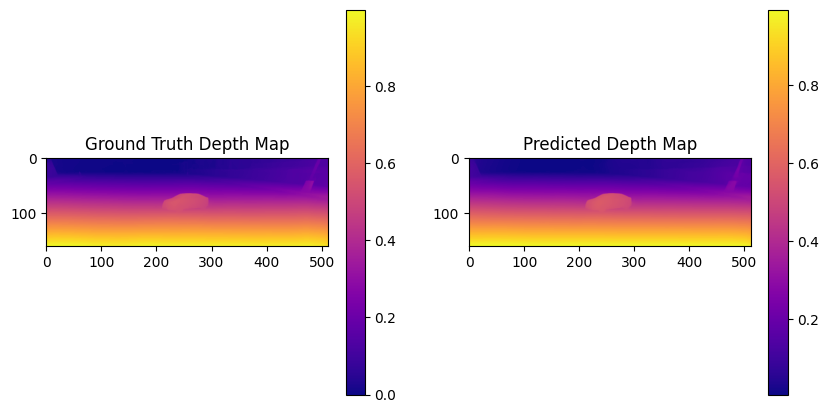

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 183s 155ms/step - loss: 0.0038
Epoch 10/10
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0037
Epoch 10: saving model to training_1/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 10:
  Ground truth depth range: [0.0000, 0.9971]
  Predicted depth range: [0.0000, 0.9884]


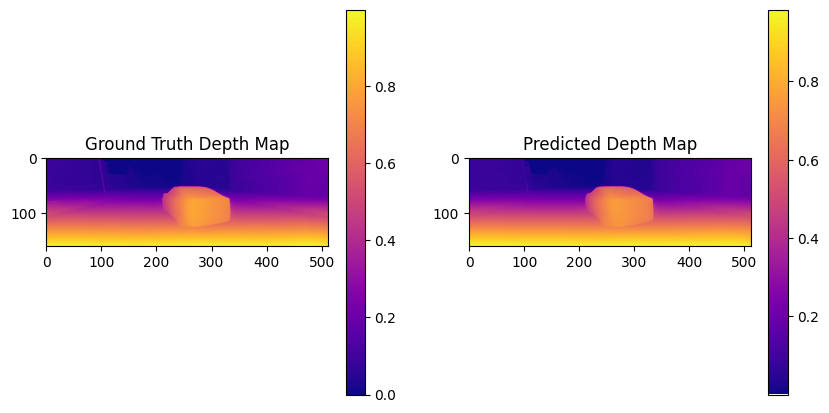

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 183s 155ms/step - loss: 0.0037


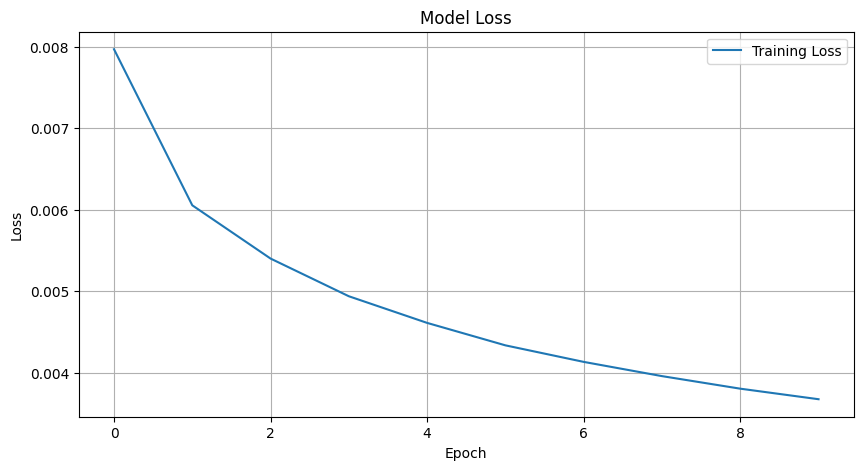

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from data import DataLoader  # Assuming data.py has the DataLoader class
from model import DepthEstimate  # Assuming model.py has the DepthEstimate model
from loss import depth_loss_function  # Assuming loss.py has the depth_loss_function

# Set parameters
batch_size = 8
learning_rate = 0.0001
epochs = 10

# Initialize DataLoader for training data
#dl = DataLoader  # Replace with your actual training CSV path
#train_generator = dl.get_batched_dataset(batch_size=batch_size)

# Initialize the model
#model = DepthEstimate()

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, amsgrad=True)
model.compile(loss=depth_loss_function, optimizer=optimizer)

# Set up a checkpoint callback to save the model
checkpoint_path = "training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

# DepthRangeMonitor Callback
class DepthRangeMonitor(tf.keras.callbacks.Callback):
    def __init__(self, train_data):
        super(DepthRangeMonitor, self).__init__()
        self.train_data = train_data

    def on_epoch_end(self, epoch, logs=None):
        # Get a batch of data from the training set
        sample_batch = next(iter(self.train_data))

        # Get the ground truth and the predictions
        y_true = sample_batch[1]  # True depth maps
        y_pred = self.model.predict(sample_batch[0])  # Predicted depth maps

        # Calculate the min and max values
        true_min, true_max = tf.reduce_min(y_true), tf.reduce_max(y_true)
        pred_min, pred_max = tf.reduce_min(y_pred), tf.reduce_max(y_pred)

        # Print the min and max values
        print(f'Epoch {epoch + 1}:')
        print(f'  Ground truth depth range: [{true_min.numpy():.4f}, {true_max.numpy():.4f}]')
        print(f'  Predicted depth range: [{pred_min.numpy():.4f}, {pred_max.numpy():.4f}]')

        # Visualize the first depth map in the batch
        plt.figure(figsize=(10, 5))

        # Ground truth depth map
        plt.subplot(1, 2, 1)
        plt.imshow(y_true[0, :, :, 0], cmap='plasma')
        plt.title('Ground Truth Depth Map')
        plt.colorbar()

        # Predicted depth map
        plt.subplot(1, 2, 2)
        plt.imshow(y_pred[0, :, :, 0], cmap='plasma')
        plt.title('Predicted Depth Map')
        plt.colorbar()

        # Show the plots
        plt.show()

# Instantiate the DepthRangeMonitor
depth_range_monitor = DepthRangeMonitor(train_generator)

# Train the model and capture the history
history = model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=dl.length // batch_size,
                    callbacks=[cp_callback, depth_range_monitor])

# Plot the learning curve after training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# **Load Pre-Trained Model Weights**


In [ ]:
# Assuming model is already defined and initialized as an instance of DepthEstimate
#model = DepthEstimate()  # You can skip this if the model is already defined
from model import DepthEstimate

#model = DepthEstimate()
# Load the trained weights into the existing model instance
checkpoint_path = "training_2/cp.weights.h5"  # Path to your saved weights file
model.load_weights(checkpoint_path)

print("Weights loaded into the existing model instance.")


Weights loaded into the existing model instance.


# **Make Predictions and Save Depth Maps**


Processing file: /content/test_patched/images/epoch_3_augmented_img_6170.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_3_augmented_img_6170.png


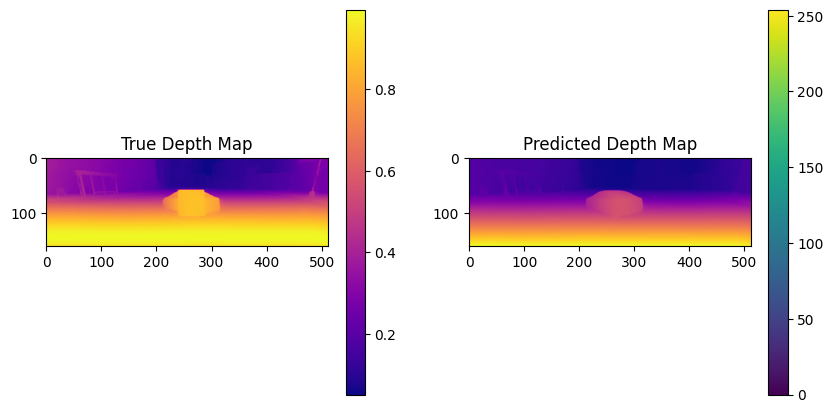

Processing file: /content/test_patched/images/augmented_img_1289.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Saved: trained_predicted_test_patched_depthmaps/augmented_img_1289.png


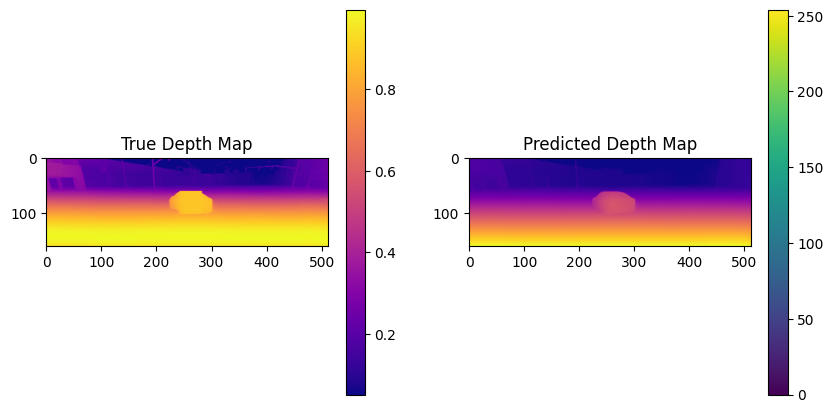

Processing file: /content/test_patched/images/augmented_img_1722.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Saved: trained_predicted_test_patched_depthmaps/augmented_img_1722.png


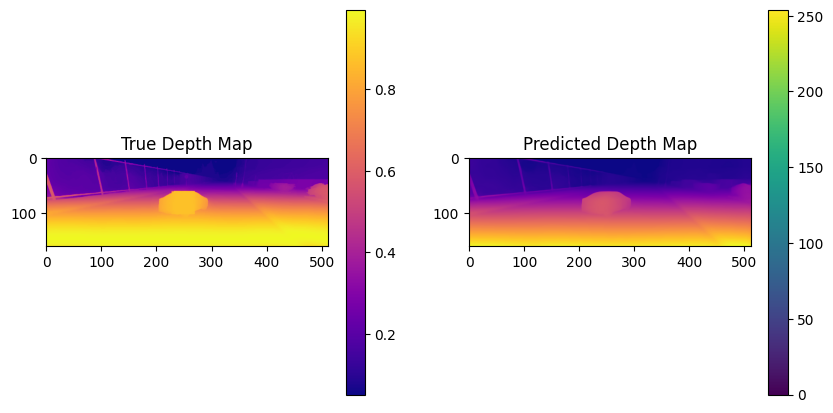

Processing file: /content/test_patched/images/augmented_img_350.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved: trained_predicted_test_patched_depthmaps/augmented_img_350.png


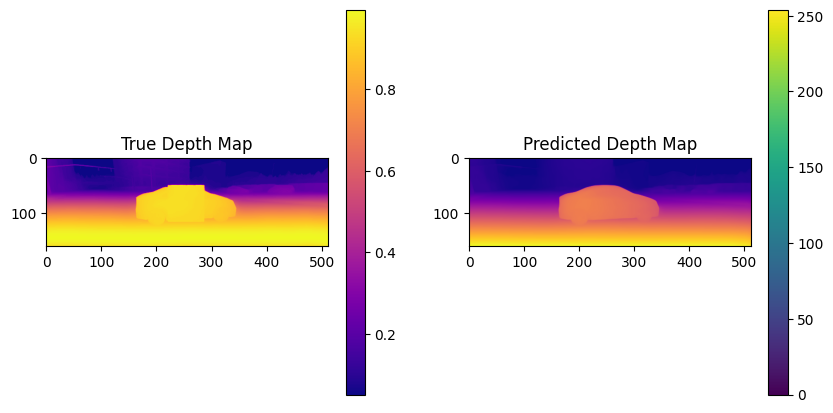

Processing file: /content/test_patched/images/augmented_img_3779.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved: trained_predicted_test_patched_depthmaps/augmented_img_3779.png


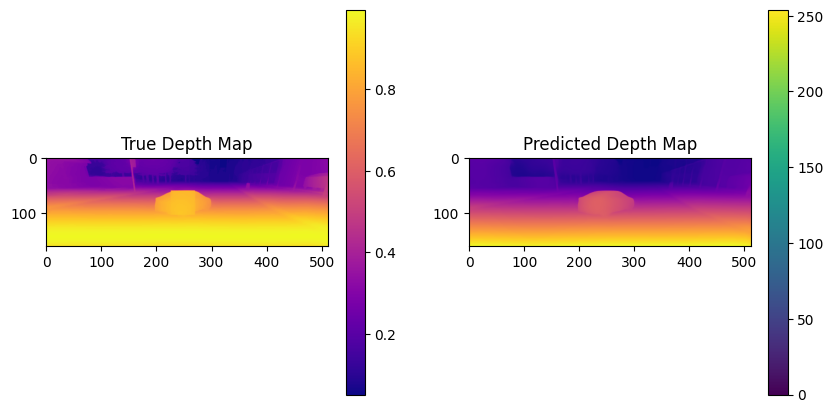

Processing file: /content/test_patched/images/augmented_img_1019.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Saved: trained_predicted_test_patched_depthmaps/augmented_img_1019.png


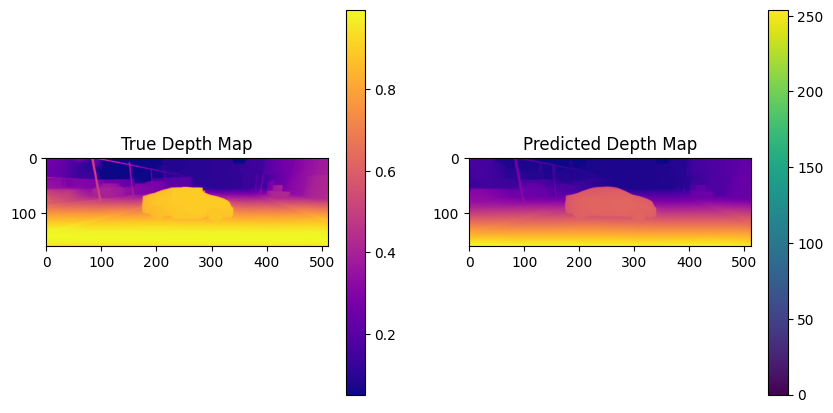

Processing file: /content/test_patched/images/augmented_img_3051.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Saved: trained_predicted_test_patched_depthmaps/augmented_img_3051.png


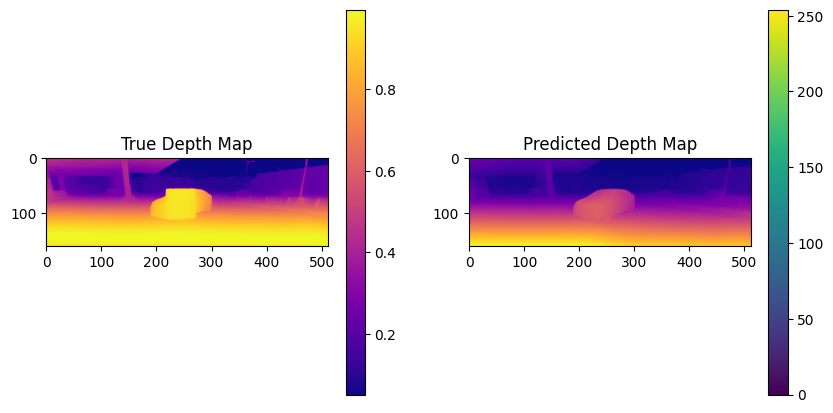

Processing file: /content/test_patched/images/epoch_2_augmented_img_2139.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_2_augmented_img_2139.png


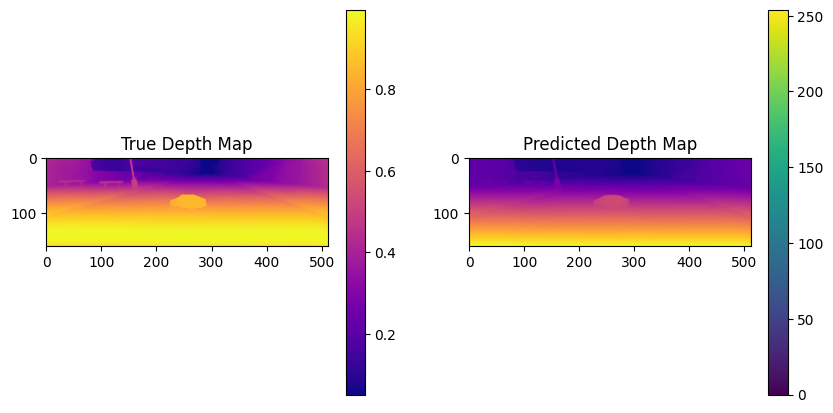

Processing file: /content/test_patched/images/epoch_3_augmented_img_5308.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_3_augmented_img_5308.png


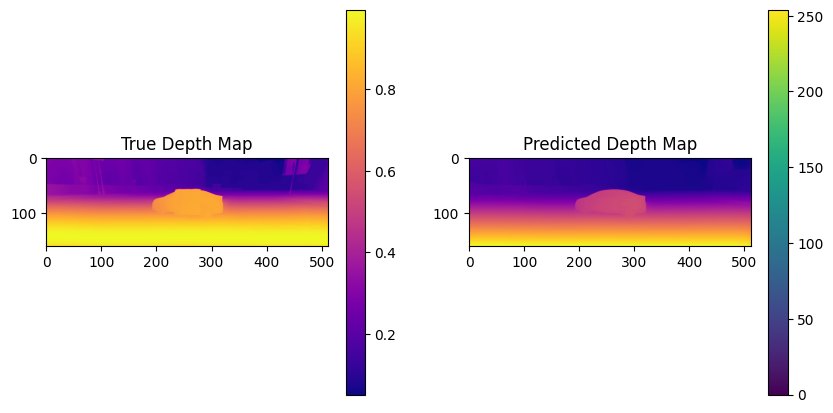

Processing file: /content/test_patched/images/epoch_2_augmented_img_3274.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_2_augmented_img_3274.png


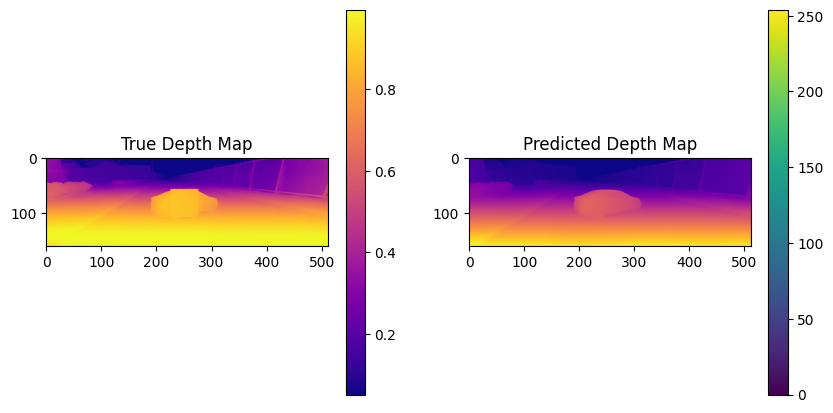

Processing file: /content/test_patched/images/epoch_2_augmented_img_2734.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_2_augmented_img_2734.png
Processing file: /content/test_patched/images/epoch_2_augmented_img_2837.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_2_augmented_img_2837.png
Processing file: /content/test_patched/images/epoch_2_augmented_img_2513.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_2_augmented_img_2513.png
Processing file: /content/test_patched/images/epoch_3_augmented_img_5654.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_3_augmented_img_5654.png
Processing file: /content/test_patched/images/epoch_1_augmented_img_249.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Saved: trained_predicted_test_patched_depthmaps/epoch_1_augmented_img_249.png
Processing file: /content/test_p

IndexError: list index out of range

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from data import DataLoader  # Assuming data.py has the DataLoader class
from model import DepthEstimate  # Assuming model.py has the DepthEstimate class

# Initialize DataLoader with your test CSV
dl = DataLoader(csv_file='/content/Dd/patched_test.csv')  # Ensure this is the correct path to your test CSV
test_generator = dl.get_batched_dataset(batch_size=1, shuffle=False)  # Disable shuffling for testing

# Create output directory for saving predicted depth maps
output_dir = "trained_predicted_test_patched_depthmaps"
os.makedirs(output_dir, exist_ok=True)

# Make predictions and save them
for i, (rgb, true_depth) in enumerate(test_generator):
    filepath = dl.filenames[i]  # Correctly extract the file path
    print(f"Processing file: {filepath}")
    pred_depth = model.predict(rgb)

    # Normalize the predicted depth map to [0, 1] range
    pred_depth_normalized = (pred_depth - tf.reduce_min(pred_depth)) / (tf.reduce_max(pred_depth) - tf.reduce_min(pred_depth))

    # Apply the "plasma" colormap to the depth map
    pred_depth_colormap = plt.get_cmap('plasma')(pred_depth_normalized[0, :, :, 0])  # Apply colormap
    pred_depth_colormap = tf.image.convert_image_dtype(pred_depth_colormap[..., :3], dtype=tf.uint8)  # Convert to uint8

    # Extract the original file name using os.path.basename
    original_filename = os.path.basename(filepath)
    output_filename = os.path.join(output_dir, original_filename.replace(".jpg", ".png"))  # Replace .jpg with .png

    # Save the image with "plasma" colormap as PNG
    tf.keras.preprocessing.image.save_img(output_filename, pred_depth_colormap)

    print(f"Saved: {output_filename}")

    # Visualization for the first 10 images
    if i < 10:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(true_depth[0, :, :, 0], cmap='plasma')
        plt.title('True Depth Map')
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.imshow(pred_depth_colormap.numpy())
        plt.title('Predicted Depth Map')
        plt.colorbar()

        plt.show()


# **Evaluate Depth Maps and Compute Metrics**

This script evaluates the predicted depth maps against ground truth maps using various metrics. The metrics computed are:

- **Mean Depth Estimation Error (Ed)**
- **Ratio of Affected Region (Ra)**
- **Absolute Relative Difference (Abs Rel)**
- **Squared Relative Difference (Sq Rel)**
- **Root Mean Squared Error (RMSE)**
- **Mean Log10 Error (Log10)**
- **Structural Similarity Index (SSIM)**

**The code compares the ground truth depth maps raw to the GT depth maps patched by the model**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_depth_map(file_path, target_size=None):
    """ Load depth map from a file path and optionally resize it. """
    image = load_img(file_path, color_mode='grayscale', target_size=target_size)
    depth_map = img_to_array(image).squeeze()  # Remove channel dimension if exists

    # Normalize depth map to [0, 1] range if necessary
    depth_map = depth_map / 255.0  # Adjust this depending on your data format

    return depth_map

def compute_metrics(true_depth, pred_depth, threshold=0.1):
    """ Compute the metrics between the true and predicted depth maps. """
    true_depth_flat = true_depth.flatten()
    pred_depth_flat = pred_depth.flatten()

    # Avoid division by zero by adding a small epsilon to true_depth_flat
    epsilon = 1e-6
    true_depth_flat_safe = np.where(true_depth_flat == 0, epsilon, true_depth_flat)

    # Mean Depth Estimation Error (Ed)
    mean_depth_error = np.mean(np.abs(true_depth_flat - pred_depth_flat))

    # Ratio of Affected Region (Ra)
    affected_region = np.mean(np.abs(true_depth_flat - pred_depth_flat) > threshold)

    # Absolute Relative Difference (Abs Rel)
    abs_rel = np.mean(np.abs(true_depth_flat - pred_depth_flat) / true_depth_flat_safe)

    # Squared Relative Difference (Sq Rel)
    sq_rel = np.mean(((true_depth_flat - pred_depth_flat) ** 2) / true_depth_flat_safe)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((true_depth_flat - pred_depth_flat) ** 2))

    # Mean Log10 Error (Log10)
    log10 = np.mean(np.abs(np.log10(true_depth_flat + epsilon) - np.log10(pred_depth_flat + epsilon)))

    # Structural Similarity Index (SSIM)
    ssim_value = ssim(true_depth, pred_depth, data_range=1.0)  # Assuming normalized depth maps in [0, 1]

    return mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value

def evaluate_depth_maps(gt_dir, pred_dir, threshold=0.1):
    """ Evaluate the predicted depth maps against the ground truth maps. """
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith('.png') or f.endswith('.jpg')])
    pred_files = sorted([f for f in os.listdir(pred_dir) if f.endswith('.png') or f.endswith('.jpg')])

    mean_depth_errors = []
    affected_regions = []
    abs_rel_errors = []
    sq_rel_errors = []
    rmse_errors = []
    log10_errors = []
    ssim_values = []

    for gt_file, pred_file in zip(gt_files, pred_files):
        gt_path = os.path.join(gt_dir, gt_file)
        pred_path = os.path.join(pred_dir, pred_file)

        # Load depth maps and resize prediction to match ground truth size
        true_depth = load_depth_map(gt_path)
        pred_depth = load_depth_map(pred_path, target_size=true_depth.shape[:2])

        # Print the depth range for both maps
        print(f"File: {gt_file}")
        print(f"  GT Depth Range: [{true_depth.min()}, {true_depth.max()}]")
        print(f"  Predicted Depth Range: [{pred_depth.min()}, {pred_depth.max()}]\n")

        # Compute metrics
        mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value = compute_metrics(true_depth, pred_depth, threshold)

        # Store metrics
        mean_depth_errors.append(mean_depth_error)
        affected_regions.append(affected_region)
        abs_rel_errors.append(abs_rel)
        sq_rel_errors.append(sq_rel)
        rmse_errors.append(rmse)
        log10_errors.append(log10)
        ssim_values.append(ssim_value)

    # Print average metrics
    print("Average Metrics:")
    print(f"  Mean Depth Estimation Error (Ed): {np.mean(mean_depth_errors)}")
    print(f"  Ratio of Affected Region (Ra): {np.mean(affected_regions)}")
    print(f"  Abs Rel: {np.mean(abs_rel_errors)}")
    print(f"  Sq Rel: {np.mean(sq_rel_errors)}")
    print(f"  RMSE: {np.mean(rmse_errors)}")
    print(f"  Log10: {np.mean(log10_errors)}")
    print(f"  SSIM: {np.mean(ssim_values)}")

# Example usage:
# Set the paths to your ground truth and predicted depth map directories
gt_directory = '/content/test/depthmaps'
pred_directory = '/content/test_patched/deptmaps'

evaluate_depth_maps(gt_directory, pred_directory)


File: augmented_img_101.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0941176488995552, 0.8705882430076599]

File: augmented_img_1019.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0941176488995552, 0.8705882430076599]

File: augmented_img_1027.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0941176488995552, 0.8705882430076599]

File: augmented_img_1036.png
  GT Depth Range: [0.0, 0.9960784316062927]
  Predicted Depth Range: [0.0941176488995552, 0.8705882430076599]

File: augmented_img_1051.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0941176488995552, 0.8666666746139526]

File: augmented_img_1060.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0941176488995552, 0.8705882430076599]

File: augmented_img_1084.png
  GT Depth Range: [0.0, 0.9960784316062927]
  Predicted Depth Range: [0.0941176488995552, 0.8705882430076599]

File: augmented_img_1114.png
  GT Depth Range: [0.0, 0.9960784316062927]
  Predicted Depth Range

# **The code compares the ground truth depth maps ra to the predicted depth maps raw generated by the model.**



In [ ]:
import os
import numpy as np
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_depth_map(file_path, target_size=None):
    """ Load depth map from a file path and optionally resize it. """
    image = load_img(file_path, color_mode='grayscale', target_size=target_size)
    depth_map = img_to_array(image).squeeze()  # Remove channel dimension if exists

    # Normalize depth map to [0, 1] range if necessary
    depth_map = depth_map / 255.0  # Adjust this depending on your data format

    return depth_map

def compute_metrics(true_depth, pred_depth, threshold=0.1):
    """ Compute the metrics between the true and predicted depth maps. """
    true_depth_flat = true_depth.flatten()
    pred_depth_flat = pred_depth.flatten()

    # Avoid division by zero by adding a small epsilon to true_depth_flat
    epsilon = 1e-6
    true_depth_flat_safe = np.where(true_depth_flat == 0, epsilon, true_depth_flat)

    # Mean Depth Estimation Error (Ed)
    mean_depth_error = np.mean(np.abs(true_depth_flat - pred_depth_flat))

    # Ratio of Affected Region (Ra)
    affected_region = np.mean(np.abs(true_depth_flat - pred_depth_flat) > threshold)

    # Absolute Relative Difference (Abs Rel)
    abs_rel = np.mean(np.abs(true_depth_flat - pred_depth_flat) / true_depth_flat_safe)

    # Squared Relative Difference (Sq Rel)
    sq_rel = np.mean(((true_depth_flat - pred_depth_flat) ** 2) / true_depth_flat_safe)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((true_depth_flat - pred_depth_flat) ** 2))

    # Mean Log10 Error (Log10)
    log10 = np.mean(np.abs(np.log10(true_depth_flat + epsilon) - np.log10(pred_depth_flat + epsilon)))

    # Structural Similarity Index (SSIM)
    ssim_value = ssim(true_depth, pred_depth, data_range=1.0)  # Assuming normalized depth maps in [0, 1]

    return mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value

def evaluate_depth_maps(gt_dir, pred_dir, threshold=0.1):
    """ Evaluate the predicted depth maps against the ground truth maps. """
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith('.png') or f.endswith('.jpg')])
    pred_files = sorted([f for f in os.listdir(pred_dir) if f.endswith('.png') or f.endswith('.jpg')])

    mean_depth_errors = []
    affected_regions = []
    abs_rel_errors = []
    sq_rel_errors = []
    rmse_errors = []
    log10_errors = []
    ssim_values = []

    for gt_file, pred_file in zip(gt_files, pred_files):
        gt_path = os.path.join(gt_dir, gt_file)
        pred_path = os.path.join(pred_dir, pred_file)

        # Load depth maps and resize prediction to match ground truth size
        true_depth = load_depth_map(gt_path)
        pred_depth = load_depth_map(pred_path, target_size=true_depth.shape[:2])

        # Print the depth range for both maps
        print(f"File: {gt_file}")
        print(f"  GT Depth Range: [{true_depth.min()}, {true_depth.max()}]")
        print(f"  Predicted Depth Range: [{pred_depth.min()}, {pred_depth.max()}]\n")

        # Compute metrics
        mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value = compute_metrics(true_depth, pred_depth, threshold)

        # Store metrics
        mean_depth_errors.append(mean_depth_error)
        affected_regions.append(affected_region)
        abs_rel_errors.append(abs_rel)
        sq_rel_errors.append(sq_rel)
        rmse_errors.append(rmse)
        log10_errors.append(log10)
        ssim_values.append(ssim_value)

    # Print average metrics
    print("Average Metrics:")
    print(f"  Mean Depth Estimation Error (Ed): {np.mean(mean_depth_errors)}")
    print(f"  Ratio of Affected Region (Ra): {np.mean(affected_regions)}")
    print(f"  Abs Rel: {np.mean(abs_rel_errors)}")
    print(f"  Sq Rel: {np.mean(sq_rel_errors)}")
    print(f"  RMSE: {np.mean(rmse_errors)}")
    print(f"  Log10: {np.mean(log10_errors)}")
    print(f"  SSIM: {np.mean(ssim_values)}")

# Example usage:
# Set the paths to your ground truth and predicted depth map directories
gt_directory = '/content/Dd/test/depthmaps'
pred_directory = '/content/Dd/predicted_test_raw'

evaluate_depth_maps(gt_directory, pred_directory)


File: augmented_img_101.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1019.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1027.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1036.png
  GT Depth Range: [0.0, 0.9960784316062927]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1051.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1060.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1084.png
  GT Depth Range: [0.0, 0.9960784316062927]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1114.png
  GT Depth Range: [0.0, 0.9960784316062927]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1120.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1131.png
  GT Depth Range: [0.0, 1.0]
  Predicted Depth Range: [0.0, 1.0]

File: 

# **The code compares the ground truth depth maps patched to the predicted depth maps raw generated by the model.**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_depth_map(file_path, target_size=None):
    """ Load depth map from a file path and optionally resize it. """
    image = load_img(file_path, color_mode='grayscale', target_size=target_size)
    depth_map = img_to_array(image).squeeze()  # Remove channel dimension if exists

    # Normalize depth map to [0, 1] range if necessary
    depth_map = depth_map / 255.0  # Adjust this depending on your data format

    return depth_map

def compute_metrics(true_depth, pred_depth, threshold=0.1):
    """ Compute the metrics between the true and predicted depth maps. """
    true_depth_flat = true_depth.flatten()
    pred_depth_flat = pred_depth.flatten()

    # Avoid division by zero by adding a small epsilon to true_depth_flat
    epsilon = 1e-6
    true_depth_flat_safe = np.where(true_depth_flat == 0, epsilon, true_depth_flat)

    # Mean Depth Estimation Error (Ed)
    mean_depth_error = np.mean(np.abs(true_depth_flat - pred_depth_flat))

    # Ratio of Affected Region (Ra)
    affected_region = np.mean(np.abs(true_depth_flat - pred_depth_flat) > threshold)

    # Absolute Relative Difference (Abs Rel)
    abs_rel = np.mean(np.abs(true_depth_flat - pred_depth_flat) / true_depth_flat_safe)

    # Squared Relative Difference (Sq Rel)
    sq_rel = np.mean(((true_depth_flat - pred_depth_flat) ** 2) / true_depth_flat_safe)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((true_depth_flat - pred_depth_flat) ** 2))

    # Mean Log10 Error (Log10)
    log10 = np.mean(np.abs(np.log10(true_depth_flat + epsilon) - np.log10(pred_depth_flat + epsilon)))

    # Structural Similarity Index (SSIM)
    ssim_value = ssim(true_depth, pred_depth, data_range=1.0)  # Assuming normalized depth maps in [0, 1]

    return mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value

def evaluate_depth_maps(gt_dir, pred_dir, threshold=0.1):
    """ Evaluate the predicted depth maps against the ground truth maps. """
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith('.png') or f.endswith('.jpg')])
    pred_files = sorted([f for f in os.listdir(pred_dir) if f.endswith('.png') or f.endswith('.jpg')])

    mean_depth_errors = []
    affected_regions = []
    abs_rel_errors = []
    sq_rel_errors = []
    rmse_errors = []
    log10_errors = []
    ssim_values = []

    for gt_file, pred_file in zip(gt_files, pred_files):
        gt_path = os.path.join(gt_dir, gt_file)
        pred_path = os.path.join(pred_dir, pred_file)

        # Load depth maps and resize prediction to match ground truth size
        true_depth = load_depth_map(gt_path)
        pred_depth = load_depth_map(pred_path, target_size=true_depth.shape[:2])

        # Print the depth range for both maps
        print(f"File: {gt_file}")
        print(f"  GT Depth Range: [{true_depth.min()}, {true_depth.max()}]")
        print(f"  Predicted Depth Range: [{pred_depth.min()}, {pred_depth.max()}]\n")

        # Compute metrics
        mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value = compute_metrics(true_depth, pred_depth, threshold)

        # Store metrics
        mean_depth_errors.append(mean_depth_error)
        affected_regions.append(affected_region)
        abs_rel_errors.append(abs_rel)
        sq_rel_errors.append(sq_rel)
        rmse_errors.append(rmse)
        log10_errors.append(log10)
        ssim_values.append(ssim_value)

    # Print average metrics
    print("Average Metrics:")
    print(f"  Mean Depth Estimation Error (Ed): {np.mean(mean_depth_errors)}")
    print(f"  Ratio of Affected Region (Ra): {np.mean(affected_regions)}")
    print(f"  Abs Rel: {np.mean(abs_rel_errors)}")
    print(f"  Sq Rel: {np.mean(sq_rel_errors)}")
    print(f"  RMSE: {np.mean(rmse_errors)}")
    print(f"  Log10: {np.mean(log10_errors)}")
    print(f"  SSIM: {np.mean(ssim_values)}")

# Example usage:
# Set the paths to your ground truth and predicted depth map directories
gt_directory = '/content/Dd/test_patched/deptmaps'
pred_directory = '/content/Dd/predicted_test_raw'

evaluate_depth_maps(gt_directory, pred_directory)


File: augmented_img_101.png
  GT Depth Range: [0.0941176488995552, 0.8705882430076599]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1019.png
  GT Depth Range: [0.0941176488995552, 0.8705882430076599]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1027.png
  GT Depth Range: [0.0941176488995552, 0.8705882430076599]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1036.png
  GT Depth Range: [0.0941176488995552, 0.8705882430076599]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1051.png
  GT Depth Range: [0.0941176488995552, 0.8666666746139526]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1060.png
  GT Depth Range: [0.0941176488995552, 0.8705882430076599]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1084.png
  GT Depth Range: [0.0941176488995552, 0.8705882430076599]
  Predicted Depth Range: [0.0, 1.0]

File: augmented_img_1114.png
  GT Depth Range: [0.0941176488995552, 0.8705882430076599]
  Predicted Depth Range: [0.0, 1.0]

F

# **Final Adversarial training using train and validation**

# **Split Data into Training and Validation Sets and Save to CSV**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
csv_file_path = '/content/Dd/train_split_patched-2.csv'  # Replace with your actual CSV file path
data = pd.read_csv(csv_file_path)

# Split the data into training and validation sets (80% training, 20% validation)
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the split data into separate CSV files
train_csv_path = '/content/Dd/train_data_patched.csv'
val_csv_path = '/content/Dd/val_data_patched.csv'

train_data.to_csv(train_csv_path, index=False)
val_data.to_csv(val_csv_path, index=False)

print(f"Training data saved to {train_csv_path}")
print(f"Validation data saved to {val_csv_path}")


Training data saved to /content/Dd/train_data_patched.csv
Validation data saved to /content/Dd/val_data_patched.csv


# **Initialize DataLoaders for Training and Validation Data, and Verify Filenames**


In [ ]:
# Initialize DataLoader for training and validation data
dl_train = DataLoader(csv_file=train_csv_path)  # Use the path to your training CSV
train_generator = dl_train.get_batched_dataset(batch_size=batch_size)
print("Filenames from DataLoader:")
for filename in dl_train.filenames[:10]:  # Print first 10 filenames for verification
    print(filename)

dl_val = DataLoader(csv_file=val_csv_path)  # Use the path to your validation CSV
val_generator = dl_val.get_batched_dataset(batch_size=batch_size)
print("Filenames from DataLoader:")
for filename in dl_val.filenames[:10]:  # Print first 10 filenames for verification
    print(filename)

Filenames from DataLoader:
/content/Dd/train_split_patched/images/epoch_2_augmented_img_2117.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_3427.png
/content/Dd/train_split_patched/images/epoch_1_augmented_img_1992.png
/content/Dd/train_split_patched/images/augmented_img_1419.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_2649.png
/content/Dd/train_split_patched/images/augmented_img_2906.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_2954.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_3343.png
/content/Dd/train_split_patched/images/augmented_img_3498.png
/content/Dd/train_split_patched/images/augmented_img_1683.png
Filenames from DataLoader:
/content/Dd/train_split_patched/images/epoch_1_augmented_img_1873.png
/content/Dd/train_split_patched/images/epoch_3_augmented_img_4555.png
/content/Dd/train_split_patched/images/augmented_img_2917.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_4037.png
/conte

# **Model Training with Validation and Depth Range Monitoring**


Filenames from Training DataLoader:
/content/Dd/train_split_patched/images/epoch_2_augmented_img_2117.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_3427.png
/content/Dd/train_split_patched/images/epoch_1_augmented_img_1992.png
/content/Dd/train_split_patched/images/augmented_img_1419.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_2649.png
/content/Dd/train_split_patched/images/augmented_img_2906.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_2954.png
/content/Dd/train_split_patched/images/epoch_2_augmented_img_3343.png
/content/Dd/train_split_patched/images/augmented_img_3498.png
/content/Dd/train_split_patched/images/augmented_img_1683.png
Filenames from Validation DataLoader:
/content/Dd/train_split_patched/images/epoch_1_augmented_img_1873.png
/content/Dd/train_split_patched/images/epoch_3_augmented_img_4555.png
/content/Dd/train_split_patched/images/augmented_img_2917.png
/content/Dd/train_split_patched/images/epoch_2_augmented

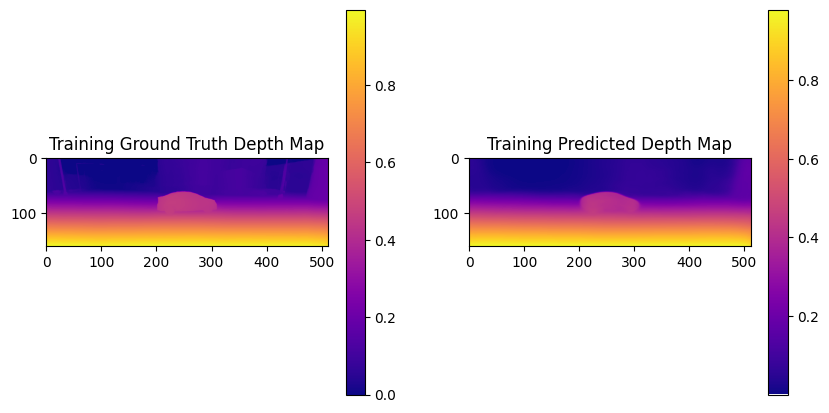

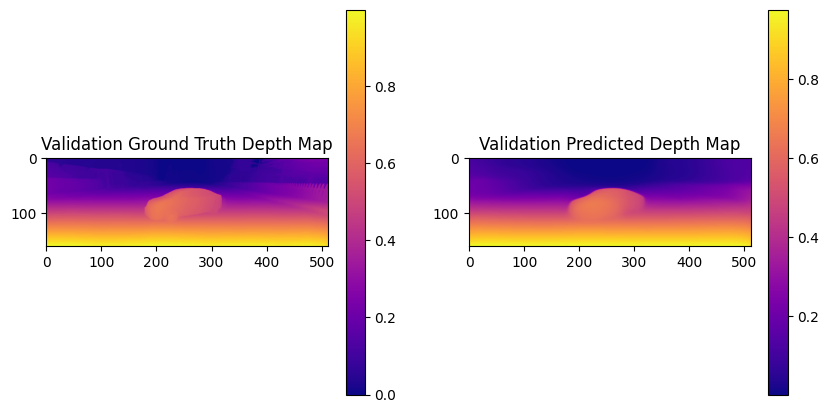

919/919 ━━━━━━━━━━━━━━━━━━━━ 530s 201ms/step - loss: 0.0123 - val_loss: 0.0068
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0066
Epoch 2: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 2:
  Training set predicted depth range: [0.0000, 0.9847]
  Validation set predicted depth range: [0.0000, 0.9823]


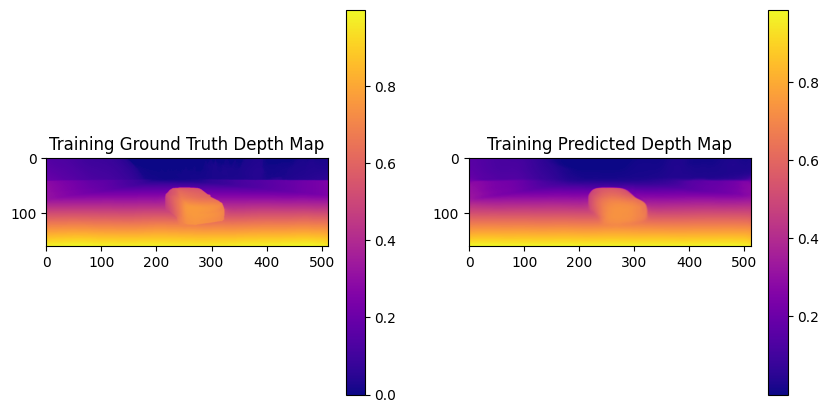

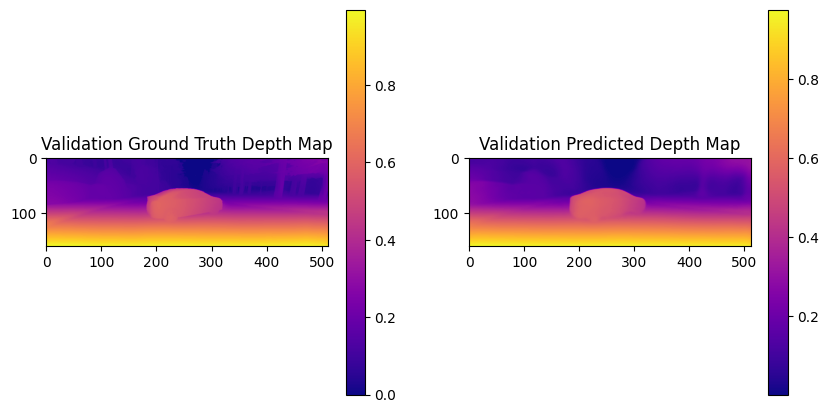

919/919 ━━━━━━━━━━━━━━━━━━━━ 156s 170ms/step - loss: 0.0066 - val_loss: 0.0060
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0059
Epoch 3: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 3:
  Training set predicted depth range: [0.0000, 0.9826]
  Validation set predicted depth range: [0.0000, 0.9843]


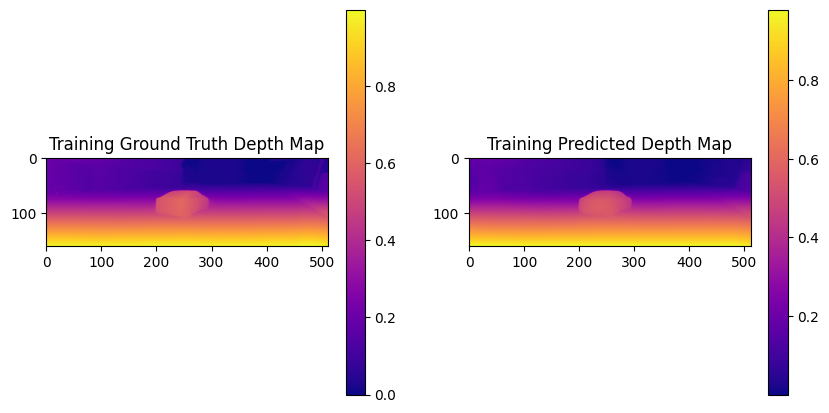

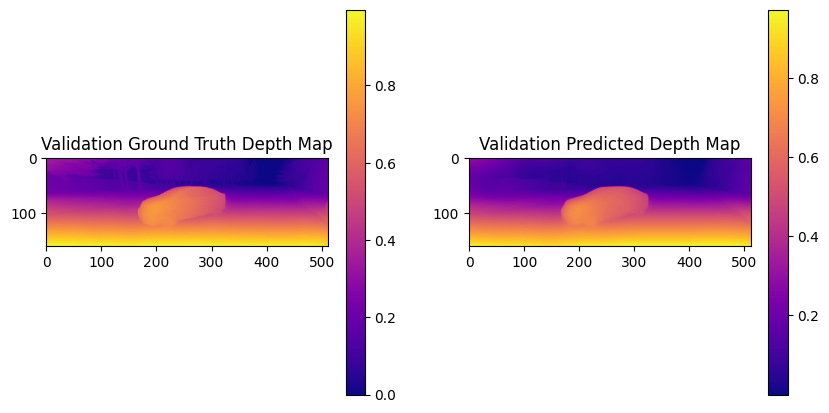

919/919 ━━━━━━━━━━━━━━━━━━━━ 157s 170ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0053
Epoch 4: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 4:
  Training set predicted depth range: [0.0000, 0.9830]
  Validation set predicted depth range: [0.0000, 0.9793]


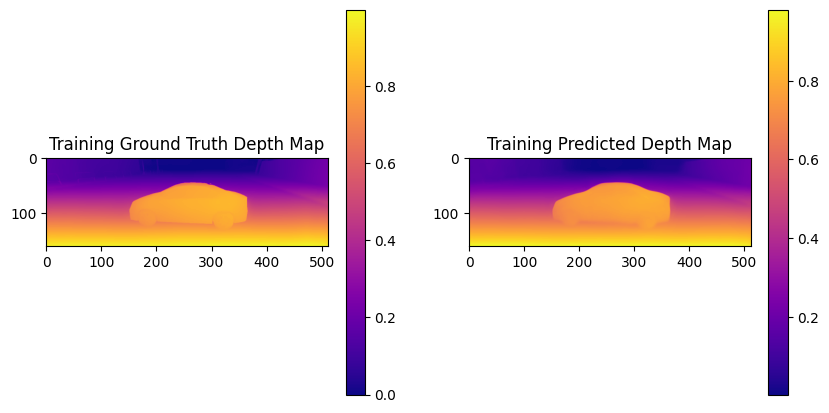

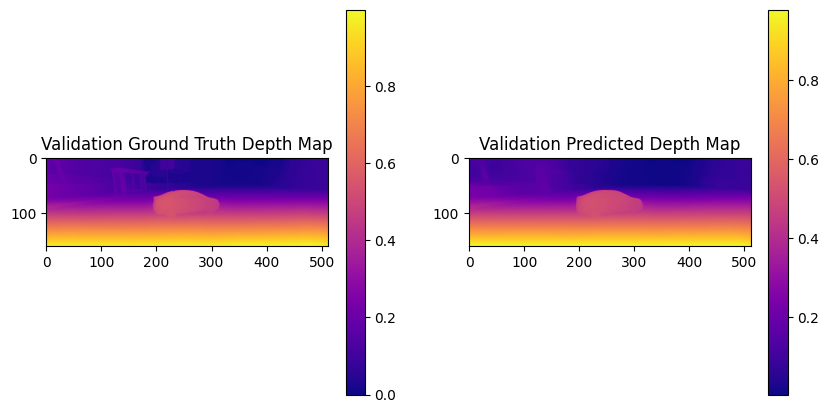

919/919 ━━━━━━━━━━━━━━━━━━━━ 157s 170ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0050
Epoch 5: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 5:
  Training set predicted depth range: [0.0000, 0.9858]
  Validation set predicted depth range: [0.0000, 0.9863]


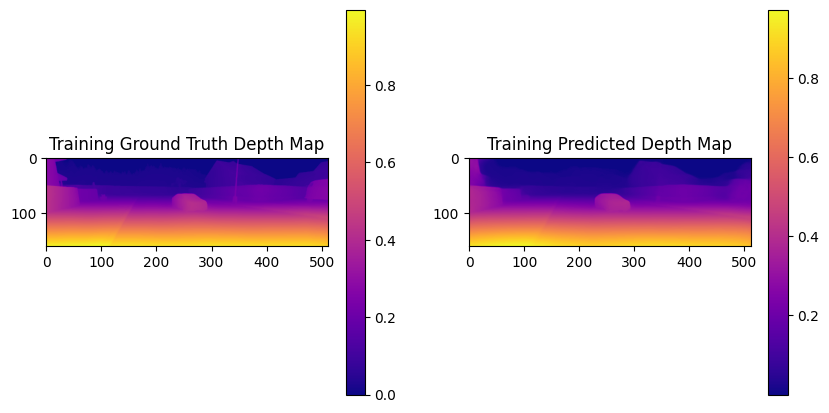

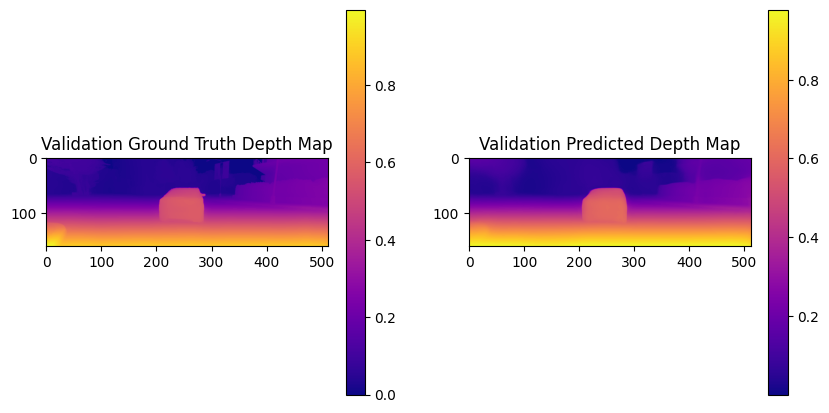

919/919 ━━━━━━━━━━━━━━━━━━━━ 156s 170ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0046
Epoch 6: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Epoch 6:
  Training set predicted depth range: [0.0000, 0.9884]
  Validation set predicted depth range: [0.0000, 0.9857]


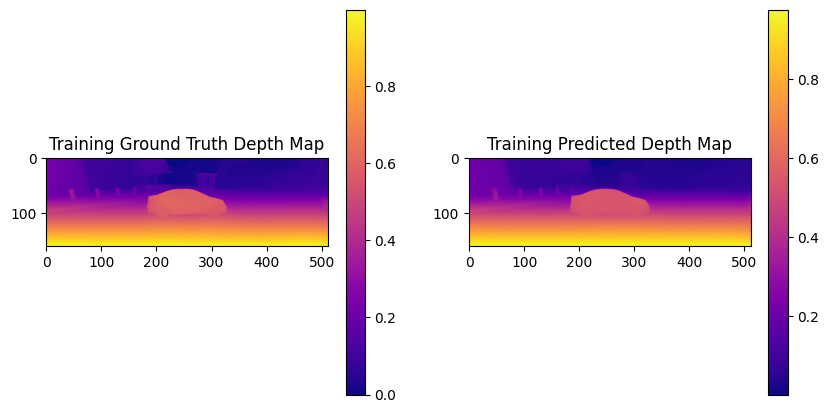

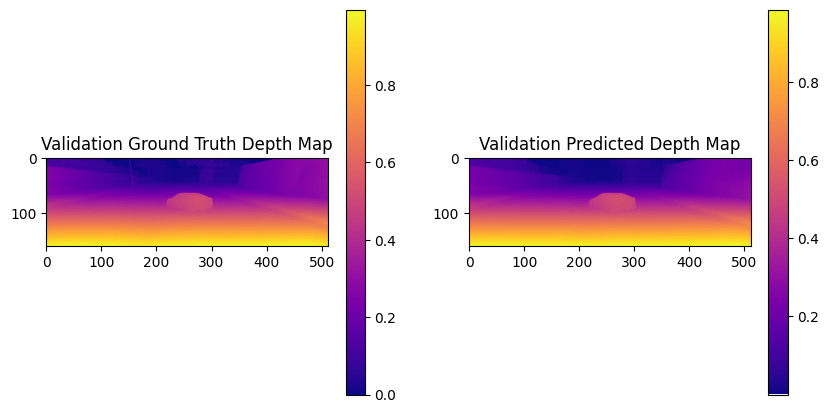

919/919 ━━━━━━━━━━━━━━━━━━━━ 156s 170ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0045
Epoch 7: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 7:
  Training set predicted depth range: [0.0000, 0.9899]
  Validation set predicted depth range: [0.0000, 0.9892]


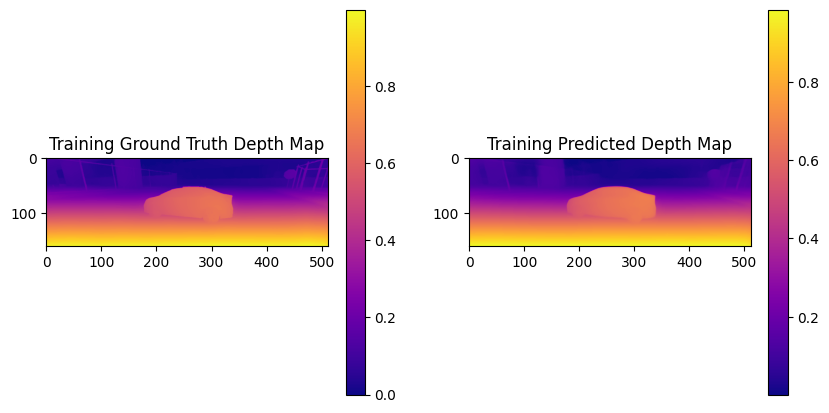

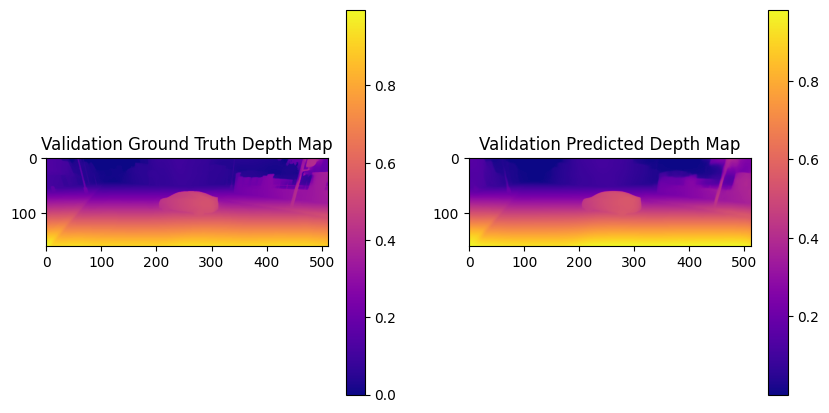

919/919 ━━━━━━━━━━━━━━━━━━━━ 156s 170ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0043
Epoch 8: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 8:
  Training set predicted depth range: [0.0000, 0.9868]
  Validation set predicted depth range: [0.0000, 0.9908]


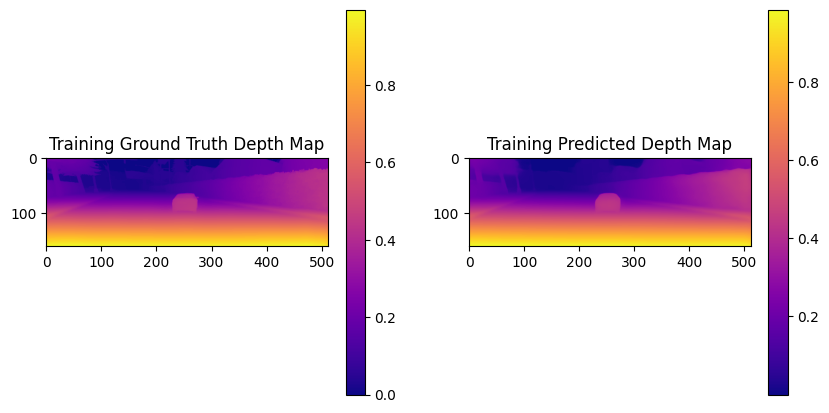

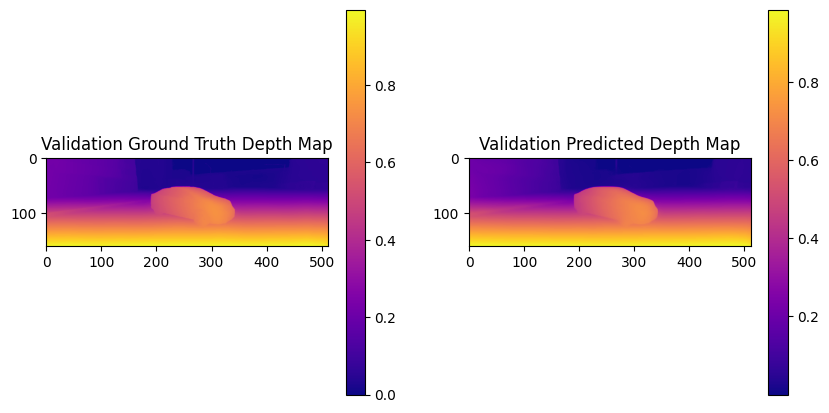

919/919 ━━━━━━━━━━━━━━━━━━━━ 156s 170ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 9/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0041
Epoch 9: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 9:
  Training set predicted depth range: [0.0000, 0.9882]
  Validation set predicted depth range: [0.0000, 0.9868]


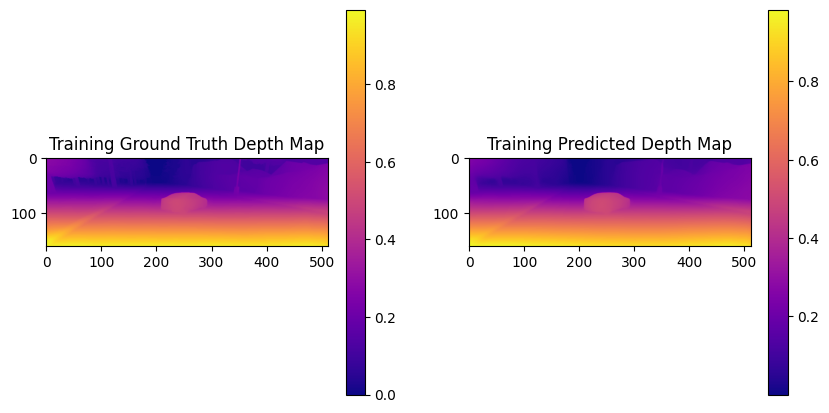

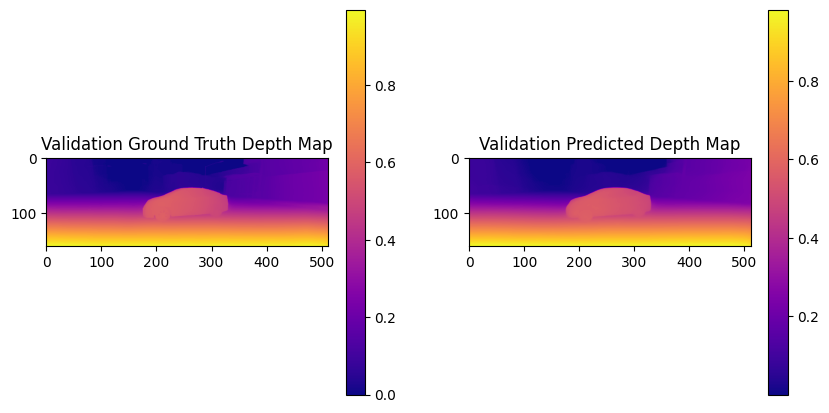

919/919 ━━━━━━━━━━━━━━━━━━━━ 156s 170ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 10/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0040
Epoch 10: saving model to training_2/cp.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 10:
  Training set predicted depth range: [0.0000, 0.9917]
  Validation set predicted depth range: [0.0000, 0.9898]


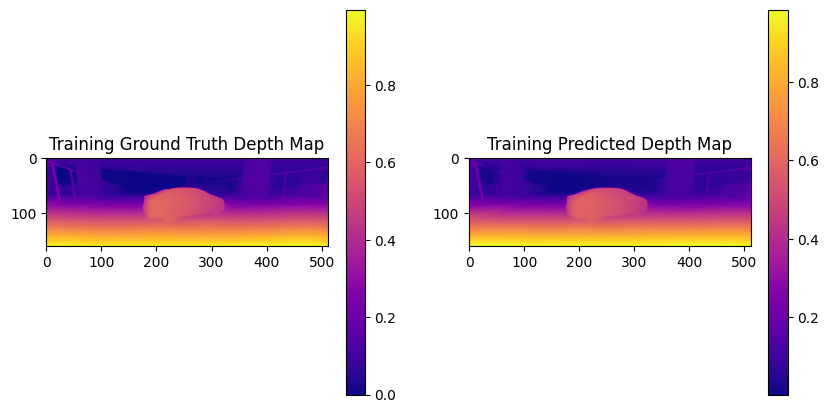

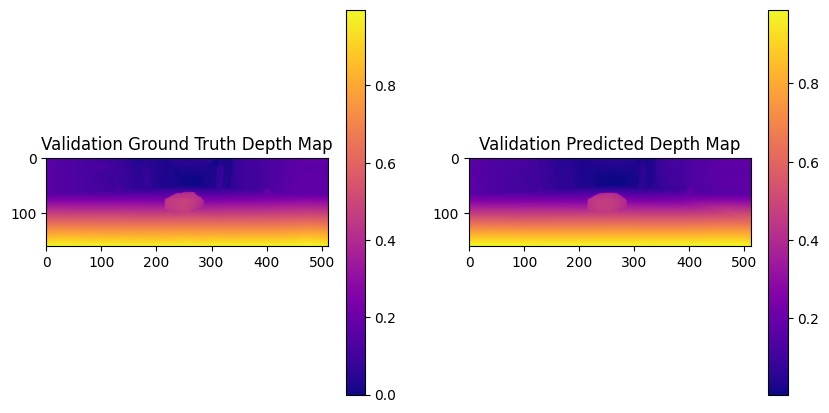

919/919 ━━━━━━━━━━━━━━━━━━━━ 157s 171ms/step - loss: 0.0040 - val_loss: 0.0043


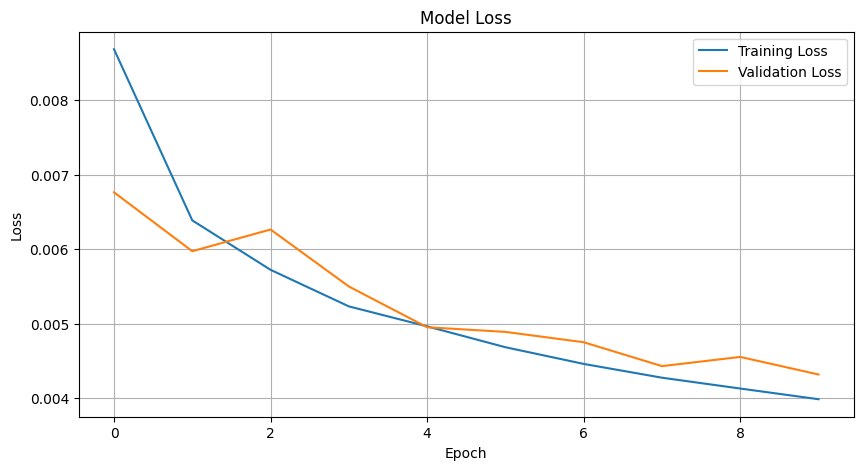

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from data import DataLoader  # Assuming data.py has the DataLoader class
from model import DepthEstimate  # Assuming model.py has the DepthEstimate model
from loss import depth_loss_function  # Assuming loss.py has the depth_loss_function

# Set parameters
batch_size = 8
learning_rate = 0.0001
epochs = 10

# Initialize the model
#model = DepthEstimate()

# Initialize DataLoader for training and validation data
dl_train = DataLoader(csv_file='/content/Dd/train_data_patched.csv')  # Replace with your actual training CSV path
train_generator = dl_train.get_batched_dataset(batch_size=batch_size)
print("Filenames from Training DataLoader:")
for filename in dl_train.filenames[:10]:  # Print first 10 filenames for verification
    print(filename)

dl_val = DataLoader(csv_file='/content/Dd/val_data_patched.csv')  # Replace with your actual validation CSV path
val_generator = dl_val.get_batched_dataset(batch_size=batch_size)
print("Filenames from Validation DataLoader:")
for filename in dl_val.filenames[:10]:  # Print first 10 filenames for verification
    print(filename)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, amsgrad=True)
model.compile(loss=depth_loss_function, optimizer=optimizer)

# Set up a callback to save only the model weights based on validation loss
checkpoint_path = "training_2/cp.weights.h5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,  # Save only the model weights
    monitor='val_loss',  # Monitor the validation loss
    mode='min',  # Save the model when the validation loss decreases
    verbose=1
)

# DepthRangeMonitor Callback
class DepthRangeMonitor(tf.keras.callbacks.Callback):
    def __init__(self, train_data, val_data):
        super(DepthRangeMonitor, self).__init__()
        self.train_data = train_data
        self.val_data = val_data

    def on_epoch_end(self, epoch, logs=None):
        # Training Data Range
        train_sample_batch = next(iter(self.train_data))
        y_true_train = train_sample_batch[1]
        y_pred_train = self.model.predict(train_sample_batch[0])
        train_min, train_max = tf.reduce_min(y_pred_train), tf.reduce_max(y_pred_train)

        # Validation Data Range
        val_sample_batch = next(iter(self.val_data))
        y_true_val = val_sample_batch[1]
        y_pred_val = self.model.predict(val_sample_batch[0])
        val_min, val_max = tf.reduce_min(y_pred_val), tf.reduce_max(y_pred_val)

        # Print the min and max values
        print(f'Epoch {epoch + 1}:')
        print(f'  Training set predicted depth range: [{train_min.numpy():.4f}, {train_max.numpy():.4f}]')
        print(f'  Validation set predicted depth range: [{val_min.numpy():.4f}, {val_max.numpy():.4f}]')

        # Visualize the first depth map in the training batch
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(y_true_train[0, :, :, 0], cmap='plasma')
        plt.title('Training Ground Truth Depth Map')
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.imshow(y_pred_train[0, :, :, 0], cmap='plasma')
        plt.title('Training Predicted Depth Map')
        plt.colorbar()

        plt.show()

        # Visualize the first depth map in the validation batch
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(y_true_val[0, :, :, 0], cmap='plasma')
        plt.title('Validation Ground Truth Depth Map')
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.imshow(y_pred_val[0, :, :, 0], cmap='plasma')
        plt.title('Validation Predicted Depth Map')
        plt.colorbar()

        plt.show()

# Instantiate the DepthRangeMonitor
depth_range_monitor = DepthRangeMonitor(train_generator, val_generator)

# Train the model with validation data and save only the weights of the best version
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=dl_train.length // batch_size,
    validation_data=val_generator,
    validation_steps=dl_val.length // batch_size,
    callbacks=[cp_callback, depth_range_monitor]
)

# Plot the learning curve after training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# **Generate and Save Depth Map Predictions for Test Data**


Processing file: /content/Dd/test_patched/images/epoch_3_augmented_img_6170.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Saved: final_trained_pred_patched/epoch_3_augmented_img_6170.png


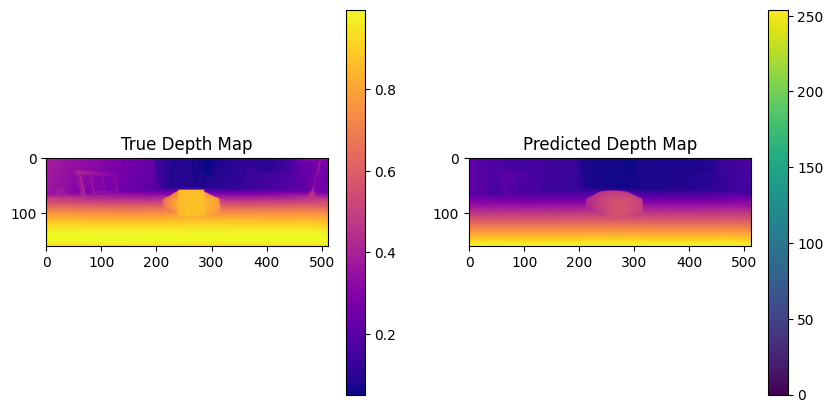

Processing file: /content/Dd/test_patched/images/augmented_img_1289.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Saved: final_trained_pred_patched/augmented_img_1289.png


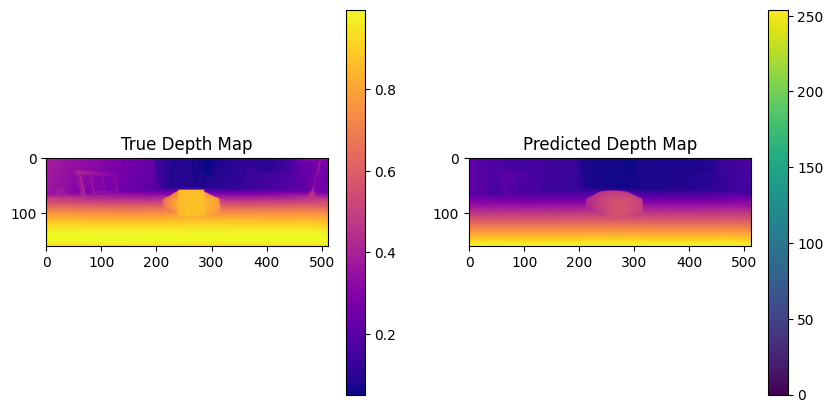

Processing file: /content/Dd/test_patched/images/augmented_img_1722.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Saved: final_trained_pred_patched/augmented_img_1722.png


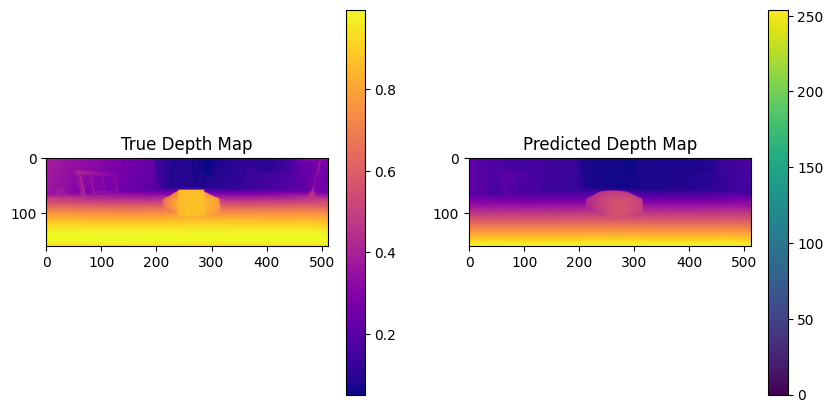

Processing file: /content/Dd/test_patched/images/augmented_img_350.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Saved: final_trained_pred_patched/augmented_img_350.png


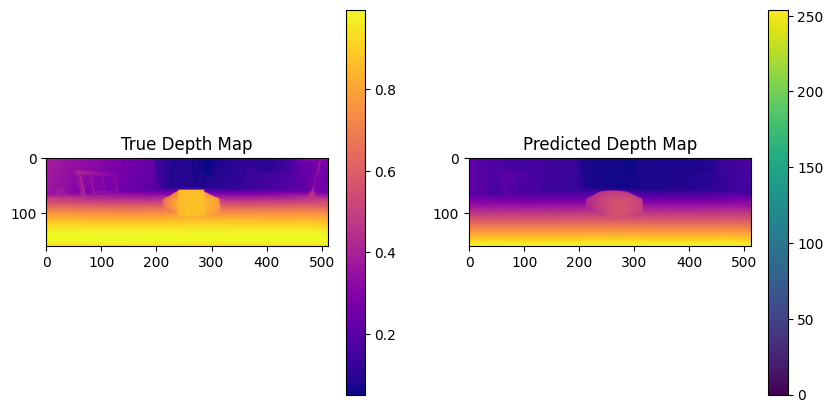

Processing file: /content/Dd/test_patched/images/augmented_img_3779.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Saved: final_trained_pred_patched/augmented_img_3779.png


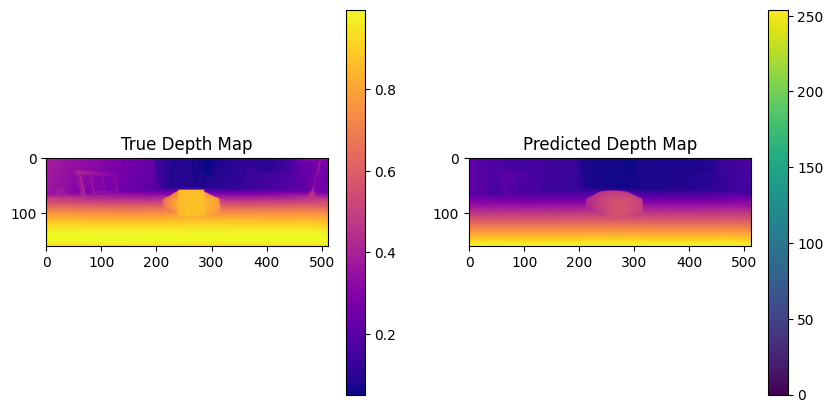

Processing file: /content/Dd/test_patched/images/augmented_img_1019.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Saved: final_trained_pred_patched/augmented_img_1019.png


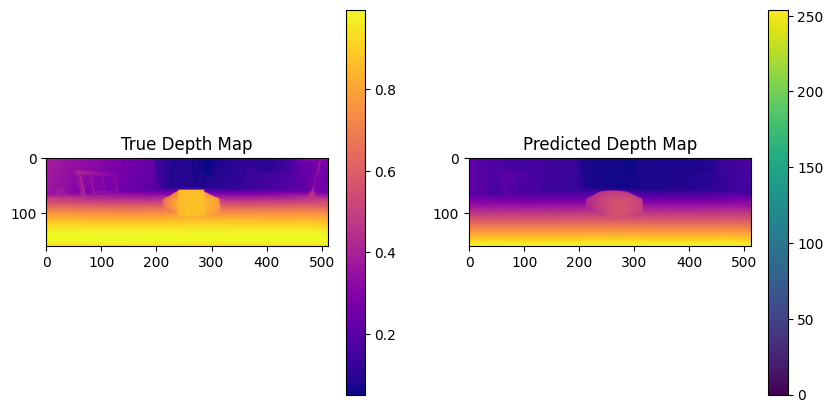

Processing file: /content/Dd/test_patched/images/augmented_img_3051.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Saved: final_trained_pred_patched/augmented_img_3051.png


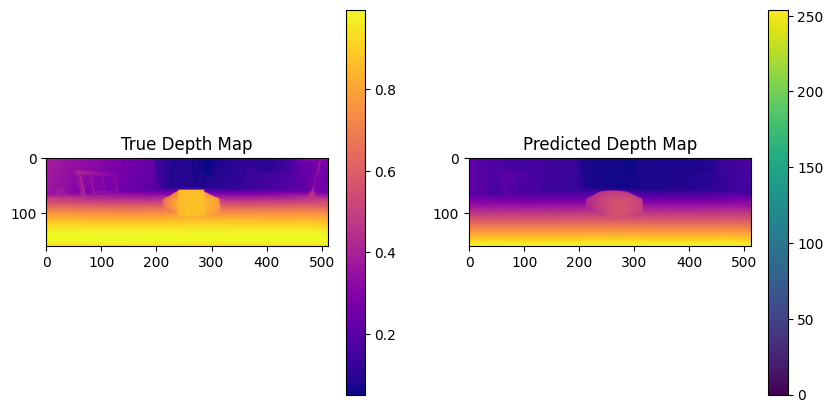

Processing file: /content/Dd/test_patched/images/epoch_2_augmented_img_2139.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Saved: final_trained_pred_patched/epoch_2_augmented_img_2139.png


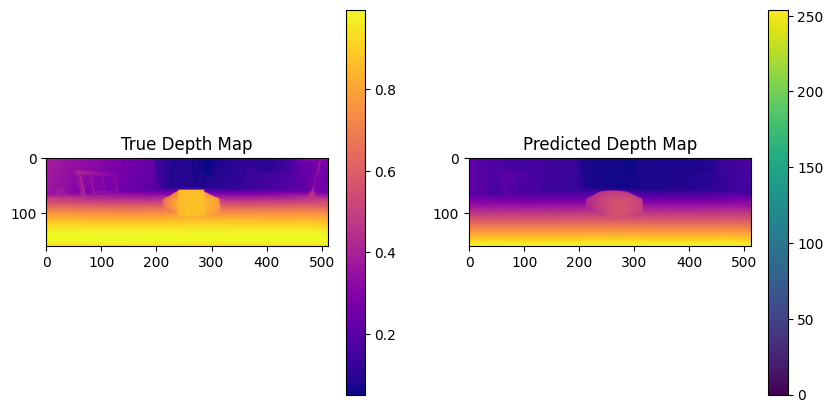

Processing file: /content/Dd/test_patched/images/epoch_3_augmented_img_5308.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Saved: final_trained_pred_patched/epoch_3_augmented_img_5308.png


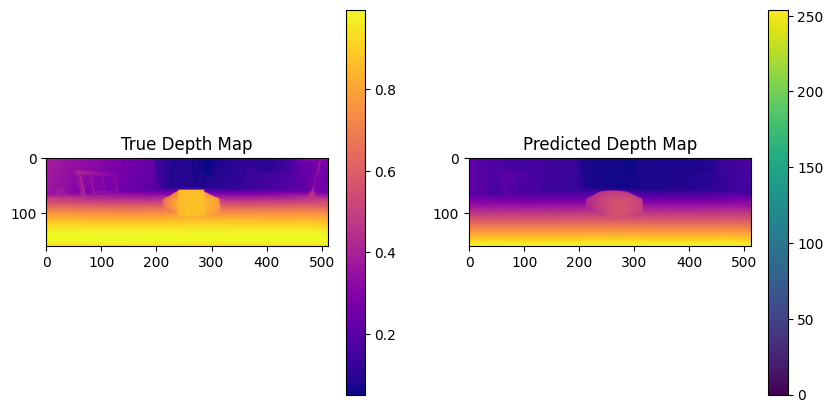

Processing file: /content/Dd/test_patched/images/epoch_2_augmented_img_3274.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Saved: final_trained_pred_patched/epoch_2_augmented_img_3274.png


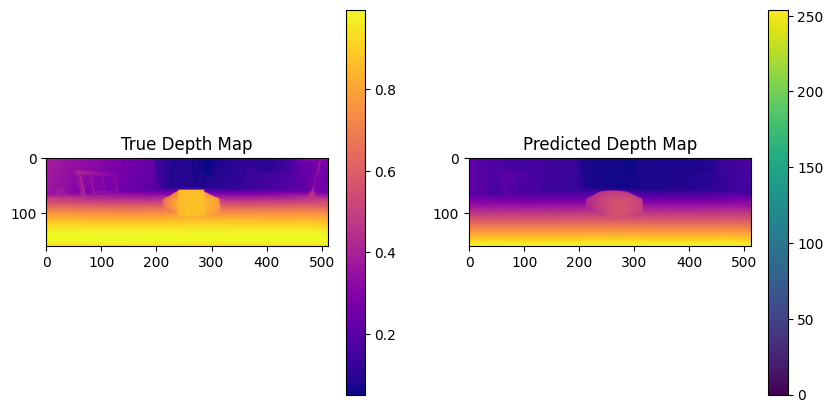

Processing file: /content/Dd/test_patched/images/epoch_2_augmented_img_2734.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Saved: final_trained_pred_patched/epoch_2_augmented_img_2734.png
Processing file: /content/Dd/test_patched/images/epoch_2_augmented_img_2837.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Saved: final_trained_pred_patched/epoch_2_augmented_img_2837.png
Processing file: /content/Dd/test_patched/images/epoch_2_augmented_img_2513.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Saved: final_trained_pred_patched/epoch_2_augmented_img_2513.png
Processing file: /content/Dd/test_patched/images/epoch_3_augmented_img_5654.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Saved: final_trained_pred_patched/epoch_3_augmented_img_5654.png
Processing file: /content/Dd/test_patched/images/epoch_1_augmented_img_249.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Saved: final_trained_pred_patched/epoch_1_augmented_img_249.png
Processing file: /content/Dd/test_patched/images/epoch_3_augmented_img_5412.png
1/1 ━━━

KeyboardInterrupt: 

In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from data import DataLoader  # Assuming data.py has the DataLoader class
from model import DepthEstimate  # Assuming model.py has the DepthEstimate class

# Initialize DataLoader with your test CSV
dl = DataLoader(csv_file='/content/Dd/patched_test.csv')  # Ensure this is the correct path to your test CSV
test_generator = dl.get_batched_dataset(batch_size=1, shuffle=False)  # Disable shuffling for testing

# Create output directory for saving predicted depth maps
output_dir = "final_trained_pred_patched"
os.makedirs(output_dir, exist_ok=True)

for i in range(len(dl.filenames)):
    rgb, true_depth = next(iter(test_generator))  # Get the next batch
    filepath = dl.filenames[i]  # Correctly extract the file path
    print(f"Processing file: {filepath}")
    pred_depth = model.predict(rgb)

    # Normalize the predicted depth map to [0, 1] range
    pred_depth_normalized = (pred_depth - tf.reduce_min(pred_depth)) / (tf.reduce_max(pred_depth) - tf.reduce_min(pred_depth))

    # Apply the "plasma" colormap to the depth map
    pred_depth_colormap = plt.get_cmap('plasma')(pred_depth_normalized[0, :, :, 0])  # Apply colormap
    pred_depth_colormap = tf.image.convert_image_dtype(pred_depth_colormap[..., :3], dtype=tf.uint8)  # Convert to uint8

    # Extract the original file name using os.path.basename
    original_filename = os.path.basename(filepath)
    output_filename = os.path.join(output_dir, original_filename.replace(".jpg", ".png"))  # Replace .jpg with .png

    # Save the image with "plasma" colormap as PNG
    tf.keras.preprocessing.image.save_img(output_filename, pred_depth_colormap)

    print(f"Saved: {output_filename}")

    # Visualization for the first 10 images
    if i < 10:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(true_depth[0, :, :, 0], cmap='plasma')
        plt.title('True Depth Map')
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.imshow(pred_depth_colormap.numpy())
        plt.title('Predicted Depth Map')
        plt.colorbar()

        plt.show()


# **Evaluation of Depth Map Predictions: Metrics Calculation, Center Cropping, and Visualization**

## Overview
This script performs evaluation of depth map predictions by comparing ground truth depth maps with predicted ones. It includes:
- **Loading and Normalizing Depth Maps**: Reads depth maps from file paths and optionally resizes them.
- **Center Cropping**: Extracts the central part of the images for consistent evaluation.
- **Metrics Calculation**: Computes various metrics to assess the quality of depth map predictions, including:
  - Mean Depth Estimation Error (Ed)
  - Ratio of Affected Region (Ra)
  - Absolute Relative Difference (Abs Rel)
  - Squared Relative Difference (Sq Rel)
  - Root Mean Squared Error (RMSE)
  - Mean Log10 Error (Log10)
  - Structural Similarity Index (SSIM)
- **Visualization**: Displays the depth maps and their differences for the first few images.

## Functions
- `load_depth_map(file_path, target_size=None)`: Loads and normalizes depth maps from file paths.
- `crop_center(image, crop_height, crop_width)`: Crops the center part of an image.
- `compute_metrics(true_depth, pred_depth, threshold=0.1)`: Computes evaluation metrics between true and predicted depth maps.
- `evaluate_depth_maps(gt_dir, pred_dir, crop_height=160, crop_width=512, threshold=0.1)`: Evaluates depth maps in given directories, calculates metrics, and visualizes results.

## Example Usage
Set the paths to the ground truth and predicted depth map directories and run the `evaluate_depth_maps` function.

```python
gt_directory = '/content/Dd/test/depthmaps'
pred_directory = '/content/Dd/trained_predicted_test_patched_depthmaps'

evaluate_depth_maps(gt_directory, pred_directory)


File: augmented_img_101.png
  GT Depth Range: [0.07058823853731155, 0.6901960968971252]
  Predicted Depth Range: [0.13725490868091583, 0.615686297416687]
  Mean Depth Estimation Error (Ed): 0.04190343618392944
  Ratio of Affected Region (Ra): 0.00303955078125
  Abs Rel: 0.11729731410741806
  Sq Rel: 0.005976674146950245
  RMSE: 0.04834917560219765
  Log10: 0.04855566471815109
  SSIM: 0.9751157434934017

  Mean Individual Difference: 0.04190343618392944


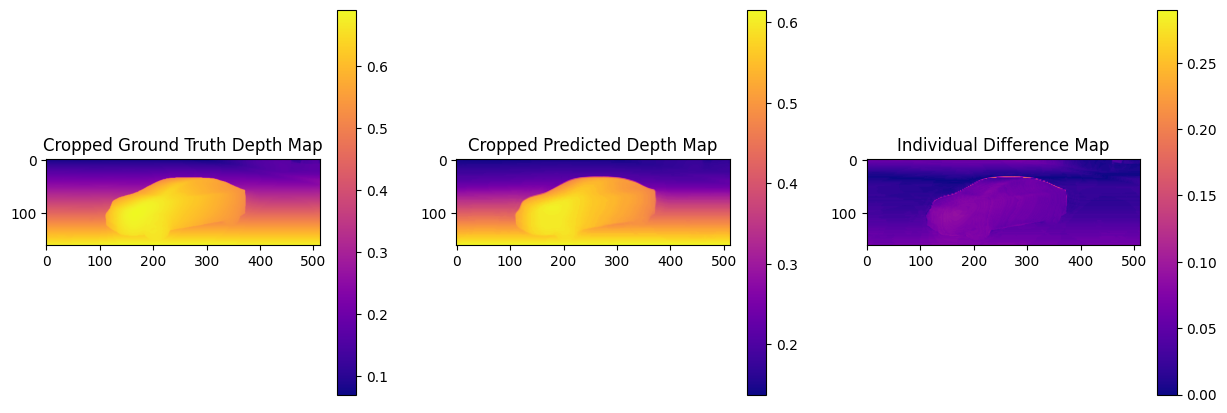

File: augmented_img_1019.png
  GT Depth Range: [0.003921568859368563, 0.6431372761726379]
  Predicted Depth Range: [0.10980392247438431, 0.5843137502670288]
  Mean Depth Estimation Error (Ed): 0.057271987199783325
  Ratio of Affected Region (Ra): 0.0201416015625
  Abs Rel: 0.6842724084854126
  Sq Rel: 0.06065041571855545
  RMSE: 0.06362540274858475
  Log10: 0.14656920731067657
  SSIM: 0.8881239550101463

  Mean Individual Difference: 0.057271987199783325


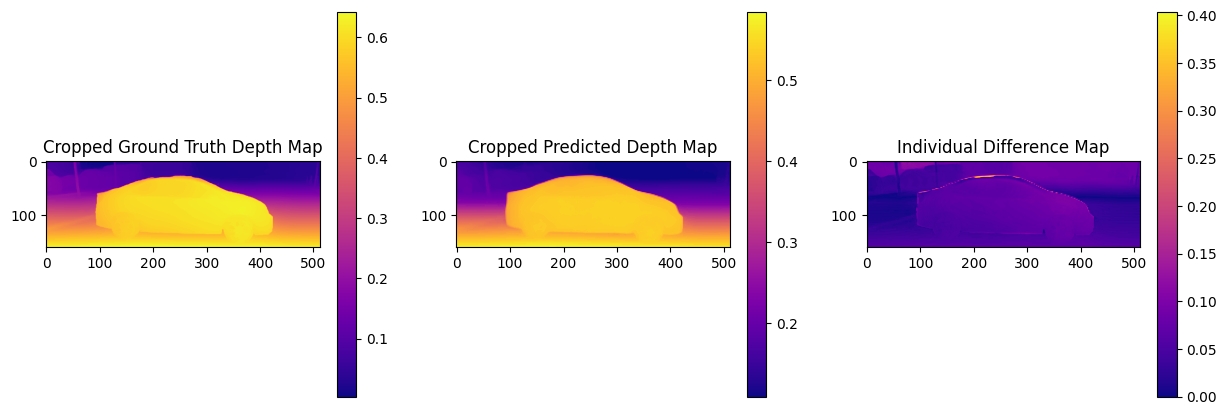

File: augmented_img_1027.png
  GT Depth Range: [0.0235294122248888, 0.6901960968971252]
  Predicted Depth Range: [0.10588235408067703, 0.572549045085907]
  Mean Depth Estimation Error (Ed): 0.06688242405653
  Ratio of Affected Region (Ra): 0.13211669921875
  Abs Rel: 0.4623273015022278
  Sq Rel: 0.03482784703373909
  RMSE: 0.07294658571481705
  Log10: 0.13721957802772522
  SSIM: 0.9018651704871338

  Mean Individual Difference: 0.06688242405653


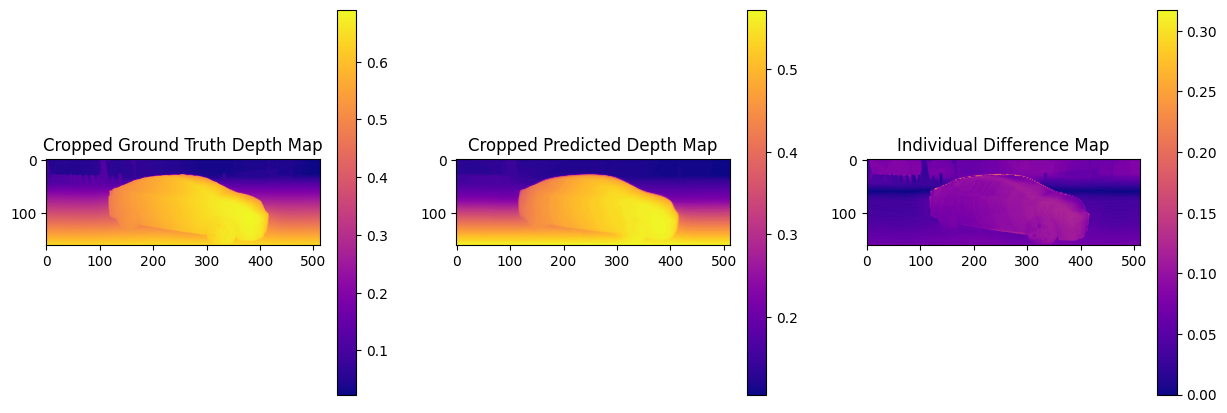

File: augmented_img_1036.png
  GT Depth Range: [0.0, 0.615686297416687]
  Predicted Depth Range: [0.10980392247438431, 0.5568627715110779]
  Mean Depth Estimation Error (Ed): 0.045057736337184906
  Ratio of Affected Region (Ra): 0.00260009765625
  Abs Rel: 73.2033462524414
  Sq Rel: 8.025606155395508
  RMSE: 0.05193465203046799
  Log10: 0.18016493320465088
  SSIM: 0.8650529751144714

  Mean Individual Difference: 0.045057736337184906


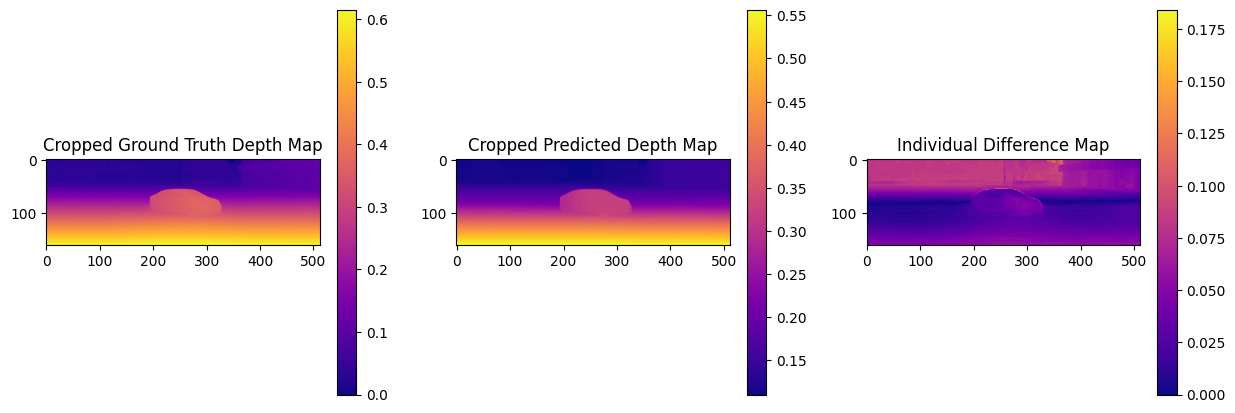

File: augmented_img_1051.png
  GT Depth Range: [0.003921568859368563, 0.6666666865348816]
  Predicted Depth Range: [0.0941176488995552, 0.6000000238418579]
  Mean Depth Estimation Error (Ed): 0.04057282209396362
  Ratio of Affected Region (Ra): 0.0011962890625
  Abs Rel: 0.39791184663772583
  Sq Rel: 0.028697306290268898
  RMSE: 0.04539911821484566
  Log10: 0.0969761461019516
  SSIM: 0.9405417821689079

  Mean Individual Difference: 0.04057282209396362


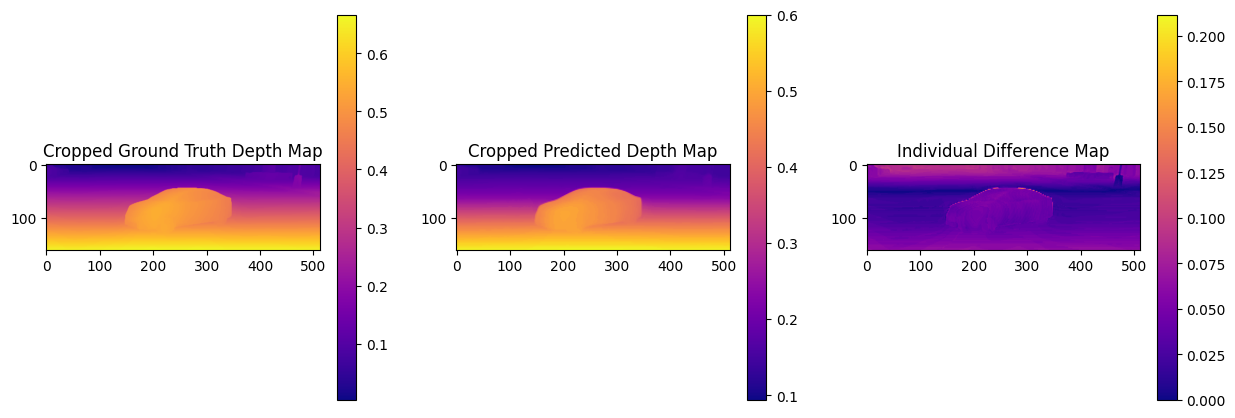

File: augmented_img_1060.png
  GT Depth Range: [0.0, 0.7137255072593689]
  Predicted Depth Range: [0.09803921729326248, 0.6352941393852234]
  Mean Depth Estimation Error (Ed): 0.0534219853579998
  Ratio of Affected Region (Ra): 0.008642578125
  Abs Rel: 134.06149291992188
  Sq Rel: 13.224804878234863
  RMSE: 0.05899825692176819
  Log10: 0.09816961735486984
  SSIM: 0.9403378252236605

  Mean Individual Difference: 0.0534219853579998


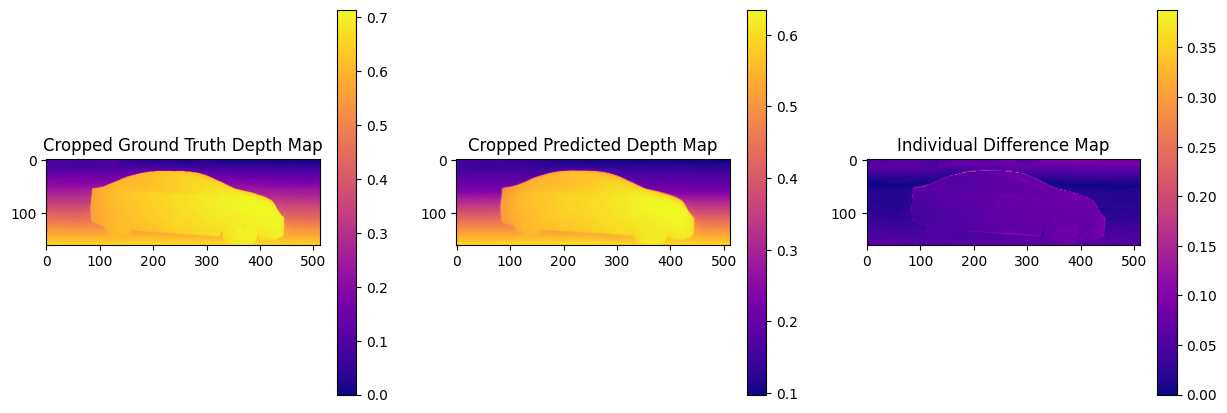

File: augmented_img_1084.png
  GT Depth Range: [0.0, 0.6941176652908325]
  Predicted Depth Range: [0.0941176488995552, 0.615686297416687]
  Mean Depth Estimation Error (Ed): 0.05223025009036064
  Ratio of Affected Region (Ra): 0.00501708984375
  Abs Rel: 21.452510833740234
  Sq Rel: 2.0236144065856934
  RMSE: 0.058333225548267365
  Log10: 0.1443144977092743
  SSIM: 0.8986366007280655

  Mean Individual Difference: 0.05223025009036064


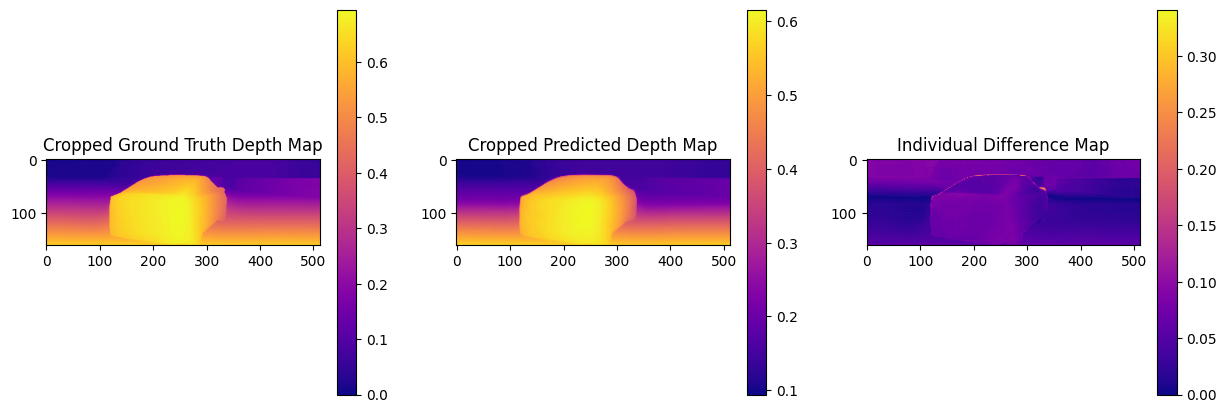

File: augmented_img_1114.png
  GT Depth Range: [0.007843137718737125, 0.6352941393852234]
  Predicted Depth Range: [0.09803921729326248, 0.5686274766921997]
  Mean Depth Estimation Error (Ed): 0.053502846509218216
  Ratio of Affected Region (Ra): 0.00452880859375
  Abs Rel: 0.7956397533416748
  Sq Rel: 0.06345625221729279
  RMSE: 0.05802452564239502
  Log10: 0.16460534930229187
  SSIM: 0.8841745884271832

  Mean Individual Difference: 0.053502846509218216


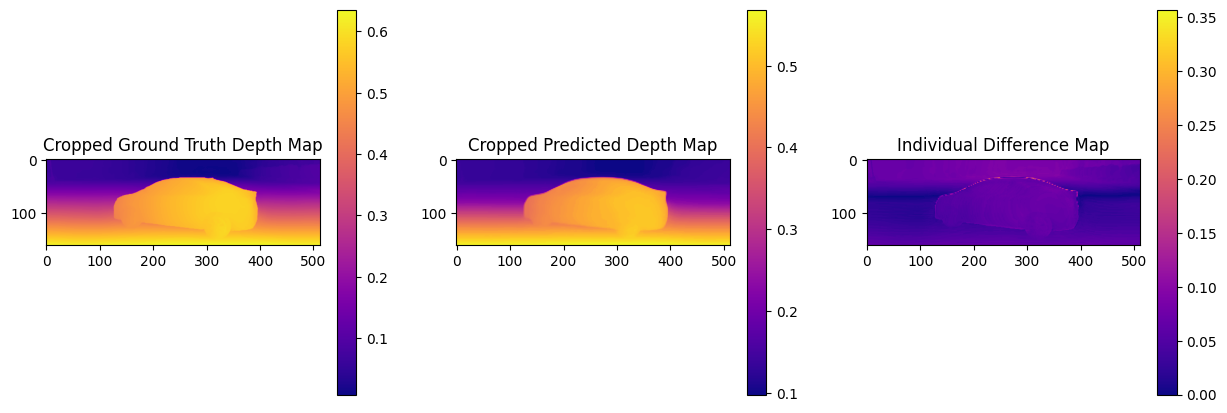

File: augmented_img_1120.png
  GT Depth Range: [0.06666667014360428, 0.7254902124404907]
  Predicted Depth Range: [0.13333334028720856, 0.6313725709915161]
  Mean Depth Estimation Error (Ed): 0.049612533301115036
  Ratio of Affected Region (Ra): 0.0061279296875
  Abs Rel: 0.1248207688331604
  Sq Rel: 0.007306179963052273
  RMSE: 0.057595394551754
  Log10: 0.05208486318588257
  SSIM: 0.9725354999429262

  Mean Individual Difference: 0.049612533301115036


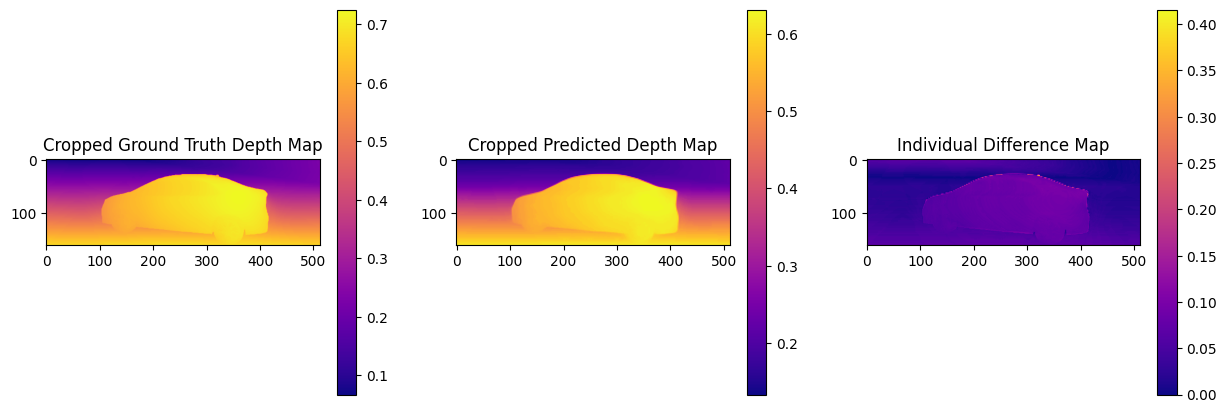

File: augmented_img_1131.png
  GT Depth Range: [0.0, 0.6392157077789307]
  Predicted Depth Range: [0.09019608050584793, 0.5647059082984924]
  Mean Depth Estimation Error (Ed): 0.06040910631418228
  Ratio of Affected Region (Ra): 0.0207763671875
  Abs Rel: 1416.401611328125
  Sq Rel: 135.85958862304688
  RMSE: 0.06585431098937988
  Log10: 0.25152480602264404
  SSIM: 0.8570861428155983

  Mean Individual Difference: 0.06040910631418228


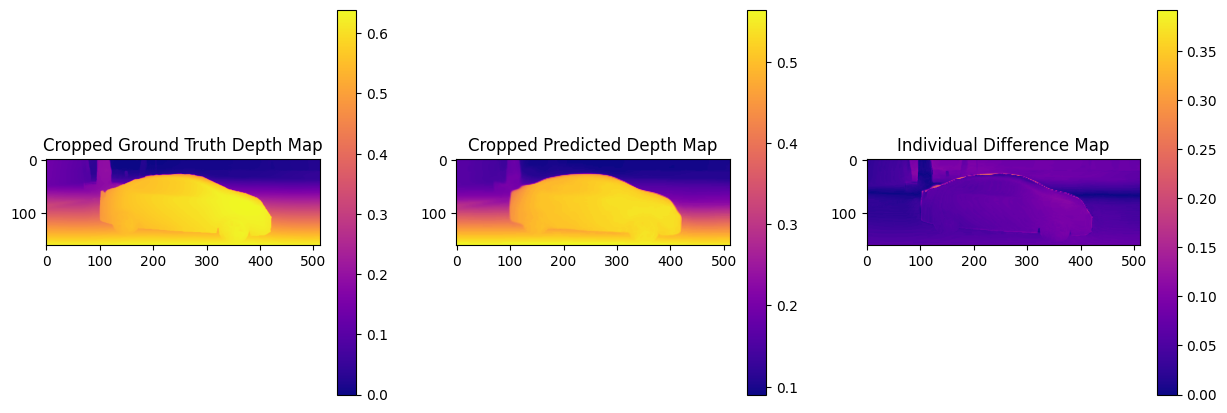

Streaming output truncated to the last 5000 lines.
File: epoch_1_augmented_img_74.png
  GT Depth Range: [0.0, 0.5411764979362488]
  Predicted Depth Range: [0.10588235408067703, 0.5960784554481506]
  Mean Depth Estimation Error (Ed): 0.11429324001073837
  Ratio of Affected Region (Ra): 0.72891845703125
  Abs Rel: 5443.77294921875
  Sq Rel: 863.3853759765625
  RMSE: 0.11896849423646927
  Log10: 0.5409833788871765
  SSIM: 0.6839028473526454

  Mean Individual Difference: 0.11429324001073837
File: epoch_1_augmented_img_75.png
  GT Depth Range: [0.0, 0.6117647290229797]
  Predicted Depth Range: [0.09803921729326248, 0.6000000238418579]
  Mean Depth Estimation Error (Ed): 0.11818309128284454
  Ratio of Affected Region (Ra): 0.451416015625
  Abs Rel: 1669.1158447265625
  Sq Rel: 229.8326416015625
  RMSE: 0.1479310691356659
  Log10: 0.2911520302295685
  SSIM: 0.7619249287132739

  Mean Individual Difference: 0.11818309128284454
File: epoch_1_augmented_img_759.png
  GT Depth Range: [0.0, 0.4509

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_depth_map(file_path, target_size=None):
    """ Load depth map from a file path and optionally resize it. """
    image = load_img(file_path, color_mode='grayscale', target_size=target_size)
    depth_map = img_to_array(image).squeeze()  # Remove channel dimension if exists

    # Normalize depth map to [0, 1] range if necessary
    depth_map = depth_map / 255.0  # Adjust this depending on your data format

    return depth_map

def crop_center(image, crop_height, crop_width):
    """Crops the center of an image."""
    height, width = image.shape[:2]
    start_x = width // 2 - (crop_width // 2)
    start_y = height // 2 - (crop_height // 2)
    return image[start_y:start_y + crop_height, start_x:start_x + crop_width]

def compute_metrics(true_depth, pred_depth, threshold=0.1):
    """ Compute the metrics between the true and predicted depth maps. """
    true_depth_flat = true_depth.flatten()
    pred_depth_flat = pred_depth.flatten()

    # Avoid division by zero by adding a small epsilon to true_depth_flat
    epsilon = 1e-6
    true_depth_flat_safe = np.where(true_depth_flat == 0, epsilon, true_depth_flat)

    # Mean Depth Estimation Error (Ed)
    mean_depth_error = np.mean(np.abs(true_depth_flat - pred_depth_flat))

    # Ratio of Affected Region (Ra)
    affected_region = np.mean(np.abs(true_depth_flat - pred_depth_flat) > threshold)

    # Absolute Relative Difference (Abs Rel)
    abs_rel = np.mean(np.abs(true_depth_flat - pred_depth_flat) / true_depth_flat_safe)

    # Squared Relative Difference (Sq Rel)
    sq_rel = np.mean(((true_depth_flat - pred_depth_flat) ** 2) / true_depth_flat_safe)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((true_depth_flat - pred_depth_flat) ** 2))

    # Mean Log10 Error (Log10)
    log10 = np.mean(np.abs(np.log10(true_depth_flat + epsilon) - np.log10(pred_depth_flat + epsilon)))

    # Structural Similarity Index (SSIM)
    ssim_value = ssim(true_depth, pred_depth, data_range=1.0)  # Assuming normalized depth maps in [0, 1]

    return mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value

def evaluate_depth_maps(gt_dir, pred_dir, crop_height=160, crop_width=512, threshold=0.1):
    """ Evaluate the predicted depth maps against the ground truth maps, with cropping to center part. """
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith('.png') or f.endswith('.jpg')])
    pred_files = sorted([f for f in os.listdir(pred_dir) if f.endswith('.png') or f.endswith('.jpg')])

    mean_depth_errors = []
    affected_regions = []
    abs_rel_errors = []
    sq_rel_errors = []
    rmse_errors = []
    log10_errors = []
    ssim_values = []

    for i, (gt_file, pred_file) in enumerate(zip(gt_files, pred_files)):
        gt_path = os.path.join(gt_dir, gt_file)
        pred_path = os.path.join(pred_dir, pred_file)

        # Load depth maps and resize prediction to match ground truth size
        true_depth = load_depth_map(gt_path)
        pred_depth = load_depth_map(pred_path, target_size=true_depth.shape[:2])

        # Crop the center part of the images
        true_depth_cropped = crop_center(true_depth, crop_height, crop_width)
        pred_depth_cropped = crop_center(pred_depth, crop_height, crop_width)

        # Print the depth range for both maps
        print(f"File: {gt_file}")
        print(f"  GT Depth Range: [{true_depth_cropped.min()}, {true_depth_cropped.max()}]")
        print(f"  Predicted Depth Range: [{pred_depth_cropped.min()}, {pred_depth_cropped.max()}]")

        # Compute metrics
        mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value = compute_metrics(true_depth_cropped, pred_depth_cropped, threshold)

        # Print individual metrics
        print(f"  Mean Depth Estimation Error (Ed): {mean_depth_error}")
        print(f"  Ratio of Affected Region (Ra): {affected_region}")
        print(f"  Abs Rel: {abs_rel}")
        print(f"  Sq Rel: {sq_rel}")
        print(f"  RMSE: {rmse}")
        print(f"  Log10: {log10}")
        print(f"  SSIM: {ssim_value}\n")

        # Store metrics
        mean_depth_errors.append(mean_depth_error)
        affected_regions.append(affected_region)
        abs_rel_errors.append(abs_rel)
        sq_rel_errors.append(sq_rel)
        rmse_errors.append(rmse)
        log10_errors.append(log10)
        ssim_values.append(ssim_value)

        # Compute and print individual differences
        individual_difference = np.abs(true_depth_cropped - pred_depth_cropped)
        print(f"  Mean Individual Difference: {np.mean(individual_difference)}")

        # Visualize the first 10 cropped depth maps (GT, Pred, and Difference)
        if i < 10:
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(true_depth_cropped, cmap='plasma')
            plt.title('Cropped Ground Truth Depth Map')
            plt.colorbar()

            plt.subplot(1, 3, 2)
            plt.imshow(pred_depth_cropped, cmap='plasma')
            plt.title('Cropped Predicted Depth Map')
            plt.colorbar()

            plt.subplot(1, 3, 3)
            plt.imshow(individual_difference, cmap='plasma')
            plt.title('Individual Difference Map')
            plt.colorbar()

            plt.show()

    # Print average metrics
    print("Average Metrics:")
    print(f"  Mean Depth Estimation Error (Ed): {np.mean(mean_depth_errors)}")
    print(f"  Ratio of Affected Region (Ra): {np.mean(affected_regions)}")
    print(f"  Abs Rel: {np.mean(abs_rel_errors)}")
    print(f"  Sq Rel: {np.mean(sq_rel_errors)}")
    print(f"  RMSE: {np.mean(rmse_errors)}")
    print(f"  Log10: {np.mean(log10_errors)}")
    print(f"  SSIM: {np.mean(ssim_values)}")

# Example usage:
# Set the paths to your ground truth and predicted depth map directories
gt_directory = '/content/Dd/test/depthmaps'
pred_directory = '/content/Dd/trained_predicted_test_patched_depthmaps'

evaluate_depth_maps(gt_directory, pred_directory)


# **Evaluation of Depth Maps: Top 100 Images with Cars and patched area properly fitted in Central Crop**

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_depth_map(file_path, target_size=None):
    """ Load depth map from a file path and optionally resize it. """
    image = load_img(file_path, color_mode='grayscale', target_size=target_size)
    depth_map = img_to_array(image).squeeze()  # Remove channel dimension if exists

    # Normalize depth map to [0, 1] range if necessary
    depth_map = depth_map / 255.0  # Adjust this depending on your data format

    return depth_map

def crop_center(image, crop_height, crop_width):
    """Crops the center of an image."""
    height, width = image.shape[:2]
    start_x = width // 2 - (crop_width // 2)
    start_y = height // 2 - (crop_height // 2)
    return image[start_y:start_y + crop_height, start_x:start_x + crop_width]

def compute_metrics(true_depth, pred_depth, threshold=0.1):
    """ Compute the metrics between the true and predicted depth maps. """
    true_depth_flat = true_depth.flatten()
    pred_depth_flat = pred_depth.flatten()

    print("True Depth Min/Max:", true_depth.min(), true_depth.max())
    print("Pred Depth Min/Max:", pred_depth.min(), pred_depth.max())
    print("Absolute Differences Min/Max:", np.abs(true_depth_flat - pred_depth_flat).min(), np.abs(true_depth_flat - pred_depth_flat).max())

    # Avoid division by zero by adding a small epsilon to true_depth_flat
    epsilon = 1e-6
    true_depth_flat_safe = np.where(true_depth_flat == 0, epsilon, true_depth_flat)

    # Mean Depth Estimation Error (Ed)
    mean_depth_error = np.mean(np.abs(true_depth_flat - pred_depth_flat))

    # Ratio of Affected Region (Ra)
    affected_region = np.mean(np.abs(true_depth_flat - pred_depth_flat) > threshold)

    # Absolute Relative Difference (Abs Rel)
    abs_rel = np.mean(np.abs(true_depth_flat - pred_depth_flat) / true_depth_flat_safe)

    # Squared Relative Difference (Sq Rel)
    sq_rel = np.mean(((true_depth_flat - pred_depth_flat) ** 2) / true_depth_flat_safe)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((true_depth_flat - pred_depth_flat) ** 2))

    # Mean Log10 Error (Log10)
    log10 = np.mean(np.abs(np.log10(true_depth_flat + epsilon) - np.log10(pred_depth_flat + epsilon)))

    # Structural Similarity Index (SSIM)
    ssim_value = ssim(true_depth, pred_depth, data_range=1.0)  # Assuming normalized depth maps in [0, 1]

    return mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value

def evaluate_depth_maps(gt_dir, pred_dir, crop_height=160, crop_width=512, threshold=0.1, top_n=100):
    """ Evaluate the predicted depth maps against the ground truth maps, with cropping to center part. """
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith('.png') or f.endswith('.jpg')])
    pred_files = sorted([f for f in os.listdir(pred_dir) if f.endswith('.png') or f.endswith('.jpg')])

    metrics = []
    filenames = []

    for i, (gt_file, pred_file) in enumerate(zip(gt_files, pred_files)):
        gt_path = os.path.join(gt_dir, gt_file)
        pred_path = os.path.join(pred_dir, pred_file)

        # Load depth maps and resize prediction to match ground truth size
        true_depth = load_depth_map(gt_path)
        pred_depth = load_depth_map(pred_path, target_size=true_depth.shape[:2])

        # Crop the center part of the images
        true_depth_cropped = crop_center(true_depth, crop_height, crop_width)
        pred_depth_cropped = crop_center(pred_depth, crop_height, crop_width)

        # Compute metrics
        mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value = compute_metrics(true_depth_cropped, pred_depth_cropped, threshold)

        # Store metrics along with their corresponding filenames
        metrics.append((mean_depth_error, affected_region, abs_rel, sq_rel, rmse, log10, ssim_value))
        filenames.append(gt_file)

    # Convert list to NumPy array for easier manipulation
    metrics = np.array(metrics)
    filenames = np.array(filenames)

    # Get the top N images based on the least mean depth error (lower is better)
    top_mean_depth_error_indices = np.argsort(metrics[:, 0])[:top_n]

    # Select the corresponding metrics and filenames for the top N least mean depth error values
    top_metrics = metrics[top_mean_depth_error_indices]
    top_filenames = filenames[top_mean_depth_error_indices]

    # Calculate the average metrics for the top N least mean depth error values
    avg_mean_depth_error = np.mean(top_metrics[:, 0])
    avg_affected_region = np.mean(top_metrics[:, 1])
    avg_abs_rel = np.mean(top_metrics[:, 2])
    avg_sq_rel = np.mean(top_metrics[:, 3])
    avg_rmse = np.mean(top_metrics[:, 4])
    avg_log10 = np.mean(top_metrics[:, 5])
    avg_ssim = np.mean(top_metrics[:, 6])

    # Save the filenames of the top 100 least mean depth error images
    np.savetxt("top_mean_depth_error_filenames.txt", top_filenames, fmt="%s")

    # Print selected average metrics
    print("Top 100 Least Mean Depth Error Average Metrics:")
    print(f"  Mean Depth Estimation Error (Ed): {avg_mean_depth_error}")
    print(f"  Ratio of Affected Region (Ra): {avg_affected_region}")
    print(f"  Abs Rel: {avg_abs_rel}")
    print(f"  Sq Rel: {avg_sq_rel}")
    print(f"  RMSE: {avg_rmse}")
    print(f"  Log10: {avg_log10}")
    print(f"  SSIM: {avg_ssim}")
    print("\nTop 100 filenames saved to 'top_mean_depth_error_filenames.txt'")

# Example usage:
# Set the paths to your ground truth and predicted depth map directories
gt_directory = '/content/Dd/test/depthmaps'
pred_directory = '/content/Dd/trained_predicted_test_patched_depthmaps'

evaluate_depth_maps(gt_directory, pred_directory)


True Depth Min/Max: 0.07058824 0.6901961
Pred Depth Min/Max: 0.13725491 0.6156863
Absolute Differences Min/Max: 0.0 0.29019612
True Depth Min/Max: 0.003921569 0.6431373
Pred Depth Min/Max: 0.10980392 0.58431375
Absolute Differences Min/Max: 0.0 0.40392157
True Depth Min/Max: 0.023529412 0.6901961
Pred Depth Min/Max: 0.105882354 0.57254905
Absolute Differences Min/Max: 0.0 0.3176471
True Depth Min/Max: 0.0 0.6156863
Pred Depth Min/Max: 0.10980392 0.5568628
Absolute Differences Min/Max: 0.0 0.18431374
True Depth Min/Max: 0.003921569 0.6666667
Pred Depth Min/Max: 0.09411765 0.6
Absolute Differences Min/Max: 0.0 0.21176471
True Depth Min/Max: 0.0 0.7137255
Pred Depth Min/Max: 0.09803922 0.63529414
Absolute Differences Min/Max: 0.0 0.38823533
True Depth Min/Max: 0.0 0.69411767
Pred Depth Min/Max: 0.09411765 0.6156863
Absolute Differences Min/Max: 0.0 0.34117648
True Depth Min/Max: 0.007843138 0.63529414
Pred Depth Min/Max: 0.09803922 0.5686275
Absolute Differences Min/Max: 0.0 0.35686275
Tr